<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Краткое-описание-проекта" data-toc-modified-id="Краткое-описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Краткое описание проекта</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчет-основных-метрик-и-построение-графиков" data-toc-modified-id="Расчет-основных-метрик-и-построение-графиков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчет основных метрик и построение графиков</a></span><ul class="toc-item"><li><span><a href="#Расчет-продуктовых-метрик" data-toc-modified-id="Расчет-продуктовых-метрик-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчет продуктовых метрик</a></span><ul class="toc-item"><li><span><a href="#DAU,-WAU-и-MAU" data-toc-modified-id="DAU,-WAU-и-MAU-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>DAU, WAU и MAU</a></span></li><li><span><a href="#Число-посещений-в-день" data-toc-modified-id="Число-посещений-в-день-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Число посещений в день</a></span></li><li><span><a href="#Длительность-пользовательских-сессий-(ASL)" data-toc-modified-id="Длительность-пользовательских-сессий-(ASL)-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Длительность пользовательских сессий (ASL)</a></span></li><li><span><a href="#Retention-Rate" data-toc-modified-id="Retention-Rate-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Retention Rate</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Расчет-метрик-электронной-коммерции" data-toc-modified-id="Расчет-метрик-электронной-коммерции-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчет метрик электронной коммерции</a></span><ul class="toc-item"><li><span><a href="#Time-to-order" data-toc-modified-id="Time-to-order-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Time to order</a></span></li><li><span><a href="#Количество-заказов-на-одного-покупателя" data-toc-modified-id="Количество-заказов-на-одного-покупателя-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Количество заказов на одного покупателя</a></span></li><li><span><a href="#Средний-чек" data-toc-modified-id="Средний-чек-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Средний чек</a></span></li><li><span><a href="#LTV-по-когортам" data-toc-modified-id="LTV-по-когортам-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>LTV по когортам</a></span></li></ul></li><li><span><a href="#Расчет-маркетинговых-метрик" data-toc-modified-id="Расчет-маркетинговых-метрик-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Расчет маркетинговых метрик</a></span><ul class="toc-item"><li><span><a href="#Cost-of-marketing" data-toc-modified-id="Cost-of-marketing-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Cost of marketing</a></span></li><li><span><a href="#Cost-of-customer-acquisition" data-toc-modified-id="Cost-of-customer-acquisition-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Cost of customer acquisition</a></span></li><li><span><a href="#ROMI" data-toc-modified-id="ROMI-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>ROMI</a></span></li></ul></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Анализ бизнес-показателей (когортный анализ)

## Краткое описание проекта

Задача - снизить маркетинговые расходы (отказаться от невыгодных источников трафика и перераспределить бюджет) на основании анализа данных интернет-сервиса с июня 2017 по конец мая 2018 года. 

В рамках решения Задачи необходимо изучить:

*	как клиенты пользуются сервисом,  
*	когда делают первые покупки на сайте,
*	сколько денег приносит компании каждый клиент,
*	когда расходы на привлечение клиента окупаются.


## Обзор данных

Источники данных для анализа с июня 2017 по конец мая 2018 года - три файла следующей структуры:

1	Лог сервера с данными о посещениях сайта:

- __Uid__ — уникальный идентификатор пользователя,
- __Device__ — категория устройства пользователя,
- __Start Ts__ — дата и время начала сессии,
- __End Ts__ — дата и время окончания сессии,
- __Source Id__ — идентификатор источника перехода на сайт.

2 Выгрузка всех заказов за этот период:

- __Uid__ — уникальный идентификатор пользователя,
- __Buy Ts__ — дата и время заказа,
- __Revenue__ — сумма заказа.

3 Статистика рекламных расходов:

- __source_id__ — идентификатор рекламного источника,
- __dt__ — дата проведения рекламной кампании,
- __costs__ — расходы на эту кампанию.

Выручка измеряется в условных единицах — у.е.

## Предобработка данных

1. Загрузим ключевые библиотеки

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


2. Загрузим данные, объявим сответствующие переменные, получим общую информацию о таблицах, убедимся, что тип данных во всех колонках соответствует сохранённым в них значениям.

In [3]:
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

In [4]:
def info(table):
    print(table.info())
    display( )
    print(table.describe())
    display( )
    display(table.head())
    display( )
    print('Число дубликатов', table.duplicated().sum())
    

__Таблица visits:__

In [5]:
info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Число дубликатов 0


Переименуем столбцы: удалим заглавные буквы, заменим пробелы на знаки нижнего подчеркивания, добавим признак сеессии. Приведем столбцы со временем к правильному формату.

In [6]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [7]:
visits.columns = ['device', 'session_end_ts', 'source_id', 'session_start_ts', 'uid'] 


In [8]:
visits['session_end_ts'] = pd.to_datetime(visits['session_end_ts'])
visits['session_start_ts'] = pd.to_datetime(visits['session_start_ts'])

__Таблица orders:__

In [9]:
info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Число дубликатов 0


In [10]:
orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [11]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

__Таблица costs:__

In [12]:
info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Число дубликатов 0


In [13]:
costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [14]:
costs.columns = ['source_id', 'marketing_date', 'marketing_costs']
costs['marketing_date'] = pd.to_datetime(costs['marketing_date'])

Пропущенных значений в таблицах нет, данные с датами приведены к нужному формату, названия столбцов скорректированы - можно переходить к обработке данных.

## Расчет основных метрик и построение графиков

### Расчет продуктовых метрик

#### DAU, WAU и MAU

1. __Рассчитаем DAU, WAU и MAU по данным пользовательских сессий__. Вычислим средние значения этих метрик за весь период. Отобразим изменения метрик во времени на графиках.

1.1. Для расчета метрик дополним таблицу необходимыми данными: выделим год, месяц, неделю сессий, а также отобразим дату в коротком формате.

In [15]:
visits['session_year'] = visits['session_start_ts'].dt.year
visits['session_month'] = visits['session_start_ts'].dt.month
visits['session_week'] = visits['session_start_ts'].dt.week
visits['session_week_start'] = visits['session_start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['session_start_ts'].dt.date
visits.head(2)

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_week_start,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-15,2018-02-19


In [16]:
dau_total = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
print('Cредниее значение DAU за весь период:', int(dau_total))
print('Cредниее значение WAU за весь период:', int(wau_total))
print('Cредниее значение MAU за весь период:', int(mau_total))

Cредниее значение DAU за весь период: 907
Cредниее значение WAU за весь период: 5716
Cредниее значение MAU за весь период: 23228


Посмотрим, как меняются показатели во времени

In [17]:
dau = visits.groupby('session_date').agg({'uid':'nunique'}).reset_index()
wau = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).reset_index()
wau2 = visits.groupby('session_week_start').agg({'uid':'nunique'}).reset_index()
mau = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).reset_index()
visits['session_month_rnd'] = visits['session_start_ts'].astype('datetime64[M]')
mau2 = visits.groupby('session_month_rnd').agg({'uid':'nunique'}).reset_index()


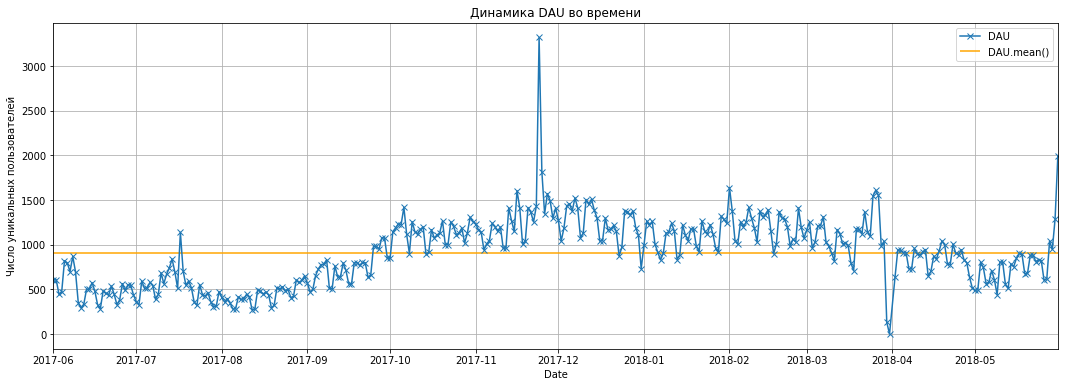

In [18]:
dau.plot(x='session_date', style='x-', figsize=(18,6), grid=True)
plt.hlines(y=dau_total, xmin=0, xmax=visits['session_date'].max(), color='orange')
plt.title('Динамика DAU во времени')
plt.xlabel('Date')
plt.ylabel('Число уникальных пользователей')
plt.legend(['DAU', 'DAU.mean()'])
plt.show()

На графике DAU видно, что есть пиковые значения (либо выбросы) в декабре 2017г., в апреле 2018г. - нужно посмотреть табличные данные внимательнее, возможно, в них закрались ошибки.

In [19]:
dau.sort_values(by='uid', ascending=False).head()

,session_date,uid
176,2017-11-24,3319
363,2018-05-31,1997
177,2017-11-25,1817
245,2018-02-01,1640
298,2018-03-26,1609


In [20]:
dau.sort_values(by='uid', ascending=False).tail()

,session_date,uid
73,2017-08-13,281
65,2017-08-05,280
72,2017-08-12,271
302,2018-03-30,131
303,2018-03-31,1


Посмотрим детальнее на дату, когда был только один уникальный пользователь.

In [21]:
visits.loc[(visits['session_start_ts'] >= '2018-03-31') & (visits['session_start_ts'] < '2018-04-01')]

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_week_start,session_date,session_month_rnd
38065,desktop,2018-03-31 14:25:00,1,2018-03-31 14:24:00,7789160382257434989,2018,3,13,2018-03-29,2018-03-31,2018-03-01


Действительно, в дату 31.03.2018 было только одно пользовательское соединение - видимо, в этот день были технические сбои.

Что касается пиковых значений 24.11.2017 года, возможно, они были обусловлены календарной "черной пятницей".

Что касается самого графика DAU, то важно отметить, что вне этих пиков нет бурного длительного роста числа уникальных пользователей в день либо их продолжительного падения - привлечение новых пользователей идет достаточно ровно. Однако после периода с октября 2017 по апрель 2018г. (когда число новых пользователей было стабильно выше среднего) начался период более низких привлечений - возможно, что-то радикально изменилось на сайте либо у него появился конкурент, оттянувший часть клиентов, и сервис стал терять новую аудиторию.

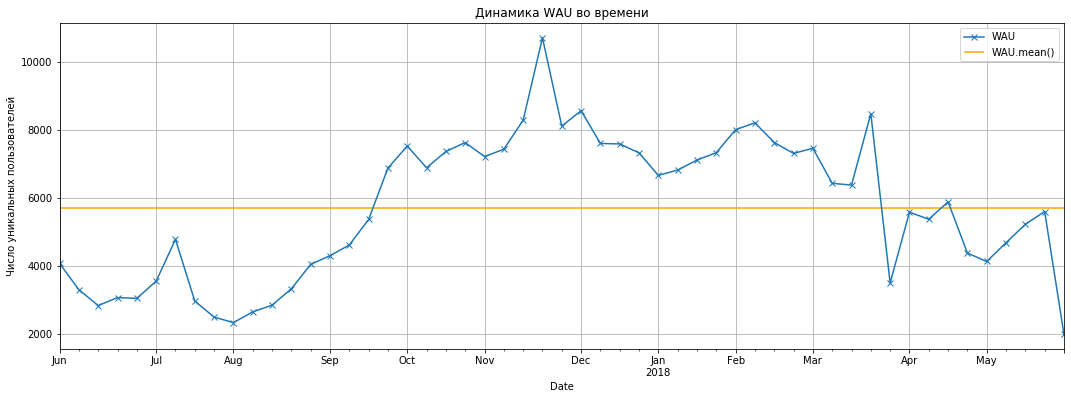

In [22]:
wau2.plot(x='session_week_start', style='x-', figsize=(18,6), grid=True)
plt.hlines(y=wau_total, xmin=0, xmax=visits['session_week_start'].max(), color='orange')
plt.title('Динамика WAU во времени')
plt.ylabel('Число уникальных пользователей')
plt.xlabel('Date')
plt.legend(['WAU', 'WAU.mean()'])
plt.show()

График с MAU также наводит на мысль о том, что что-то изменилось в конце марта, после чего число новых уникальных пользователей снизилось.

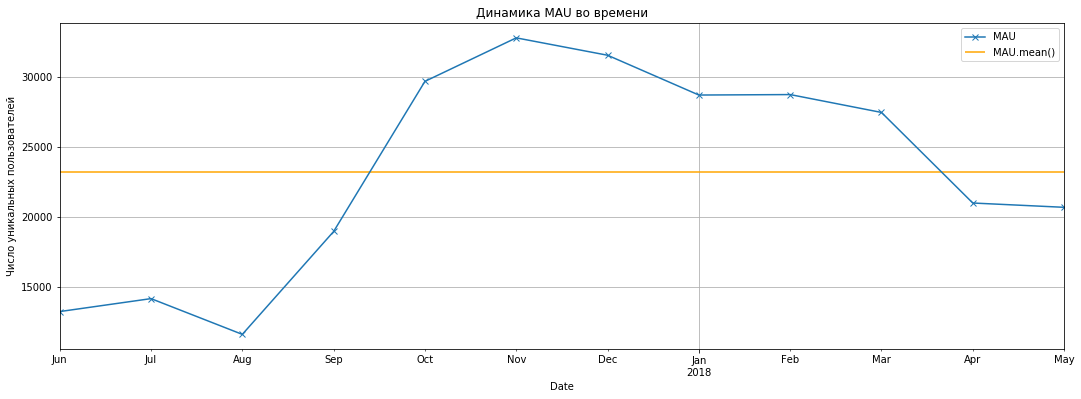

In [23]:
mau2.plot(x='session_month_rnd', style='x-', figsize=(18,6), grid=True)
plt.hlines(y=mau_total, xmin=0, xmax=visits['session_month_rnd'].max(), color='orange')
plt.title('Динамика MAU во времени')
plt.ylabel('Число уникальных пользователей')
plt.xlabel('Date')
plt.legend(['MAU', 'MAU.mean()'])
plt.show()



#### Число посещений в день

2. __Определим, сколько раз за день пользователи в среднем заходят на сайт.__ Построим график, отражающий изменения метрики во времени.

In [24]:
visits_per_user_day = visits.groupby('session_date').agg({'uid':['count','nunique']})
visits_per_user_day.columns = ['qty_visits', 'qty_users']
visits_per_user_day['visits_per_user_day'] = visits_per_user_day['qty_visits'] / visits_per_user_day['qty_users']
visits_per_user_day.head()

,qty_visits,qty_users,visits_per_user_day
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [25]:
visits_per_user_day.describe()

,qty_visits,qty_users,visits_per_user_day
count,364.000000,364.000000,364.000000
mean,987.362637,907.991758,1.082170
std,418.994796,370.513838,0.020876
min,1.000000,1.000000,1.000000
25%,635.500000,594.000000,1.070321
50%,1003.000000,921.000000,1.082488
75%,1280.000000,1173.000000,1.093876
max,4042.000000,3319.000000,1.217837


Медианное и среднее значения визитов в день близки, разброс незначителен, поэтому можно использовать действительно среднее. Тем не менее построим гистограмму, чтобы убедиться в этом

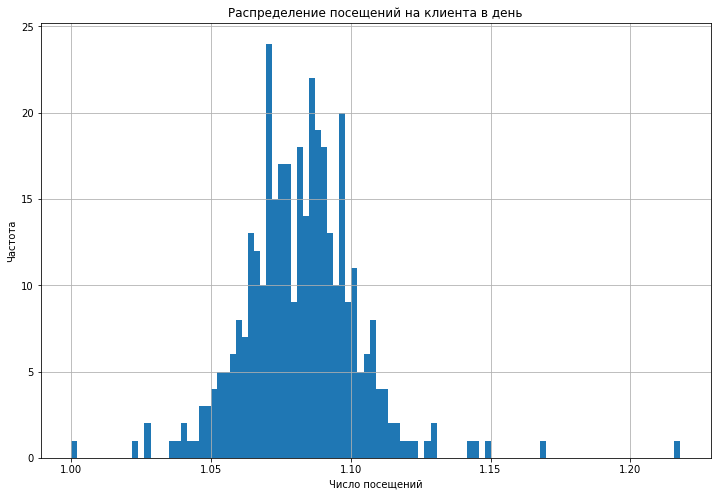

In [26]:
visits_per_user_day['visits_per_user_day'].hist(bins=100, figsize=(12,8))
plt.title('Распределение посещений на клиента в день')
plt.ylabel('Частота')
plt.xlabel('Число посещений')
plt.show()

Действительно, перекоса по одному из значений нет - моду использовать не имеет смысла. Выбросы с обеих сторон, видимо, компенсируют друг друга, поэтому и наблюдаем близкие значения медианы и среднего. Будем использовать медиану.
Учитывая количество значений (364), графическое изменение показателя будем смотреть на классической кривой.

In [27]:
print('Среднее число визитов пользователей на сайт в день:', visits_per_user_day['visits_per_user_day'].mean().round(2))

Среднее число визитов пользователей на сайт в день: 1.08


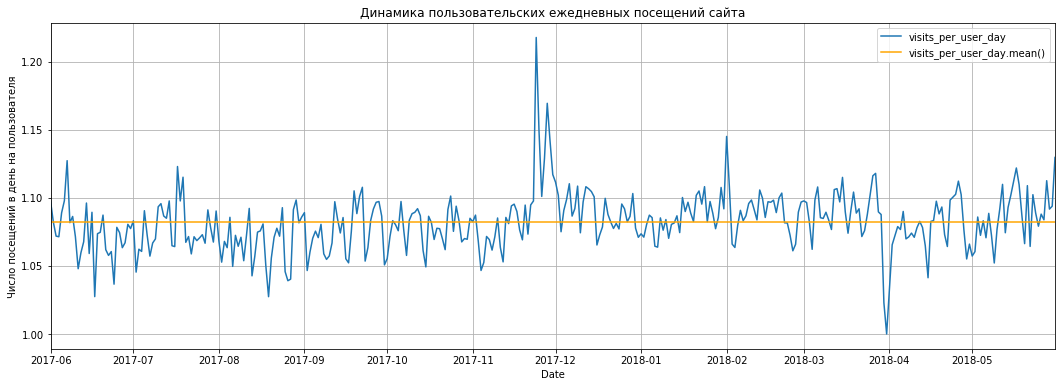

In [28]:
visits_per_user_day.plot(y='visits_per_user_day', style='', figsize=(18,6), grid=True)
plt.axhline(visits_per_user_day['visits_per_user_day'].mean(), color='orange')
plt.title('Динамика пользовательских ежедневных посещений сайта')
plt.ylabel('Число посещений в день на пользователя')
plt.xlabel('Date')
plt.legend(['visits_per_user_day', 'visits_per_user_day.mean()'])
plt.show()

Пики кривой идентичны пикам кривой DAU (что вполне логично). А вот распределение во времени относительно среднего значения (оранжевая прямая) отличается. Несмотря на снижение общего числа новых пользователей в день, которое мы видели на графике DAU, количество сессий в день на пользователя несколько возрастает, что хорошо - значит после привлечения новых пользователей их интерес к сайту становится выше в последнее время (начиная с апреля). Однако это может быть лишь географическим отражением снижения числа пользователей. Посмотрим, как меняется длительность пользовательских сессий.

#### Длительность пользовательских сессий (ASL)

3. __Исследуем, сколько времени пользователи проводят на сайте.__ Узнаем продолжительность типичной пользовательской сессии за весь период. Перед расчетом проверим, нет ли в исходных данных ошибок в виде превышения времени окончания сессии над временем ее начала.

In [29]:
visits.loc[visits['session_end_ts'] < visits['session_start_ts']]

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_week_start,session_date,session_month_rnd
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,3,12,2018-03-22,2018-03-25,2018-03-01
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018,3,12,2018-03-22,2018-03-25,2018-03-01


Учитывая небольшое количество таких некорректных строк, просто удалим их.

In [30]:
visits = visits.loc[visits['session_end_ts'] >= visits['session_start_ts']]

In [31]:
visits[visits['session_end_ts'] == visits['session_start_ts']].count()

device                35794
session_end_ts        35794
source_id             35794
session_start_ts      35794
uid                   35794
session_year          35794
session_month         35794
session_week          35794
session_week_start    35794
session_date          35794
session_month_rnd     35794
dtype: int64

~10% пользовательских сессий имеют нулевую продолжительность! Для выбора корректной меры усреднения длительности сессий необходимо будет построить распределение.

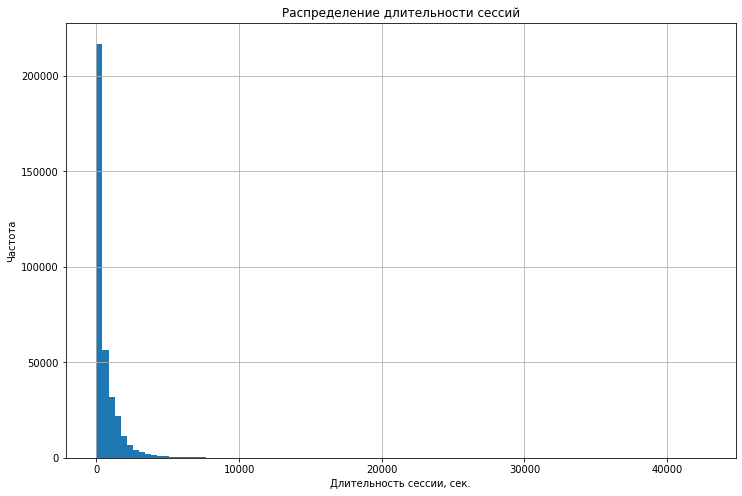

In [32]:
visits['session_duration_sec'] = (visits['session_end_ts'] - visits['session_start_ts']).dt.seconds
visits['session_duration_sec'].hist(bins=100, figsize=(12,8))
plt.title('Распределение длительности сессий')
plt.ylabel('Частота')
plt.xlabel('Длительность сессии, сек.')
plt.show()

Так и есть, большинство длительностей сессий нулевые, длина сессий распределена неравномерно, поэтому использовать среднее для расчета ASL (средней продолжительности пользовательской сессии) некорректно. Рассчитаем моду и медиану.

In [33]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

In [34]:
visits['session_duration_sec'].median()

300.0

Мода пользовательской сессии за период = 60 секунд. Но выше мы видели, что целых 10% данных - нулевые сессии, которые могут быть из-за разрывов в соединении, технических сбоев и т.д. Учитывая такое значительное число нулевых данных, считаю, что корректнее считать ASL по медиане. Получаем, в среднем, пятиминутные сессии, что вполне неплохо для интернет-сайта!

#### Retention Rate

4. __Рассчитаем Retention Rate, применяя когортный анализ.__ Покажем изменения метрики во времени на графике. Найдем средний Retention Rate на второй месяц «жизни» когорт.
Для начала выделим по каждому пользователю минимальное (самое первое) время визита для формирования когорт, затем присоединим полученное поле к таблице визитов

In [35]:
visit_1 = visits.groupby('uid')['session_date'].min()
visit_1.name = 'first_visit_date'

In [36]:
visits = visits.join(visit_1, on='uid')
visits.head(2)

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_week_start,session_date,session_month_rnd,session_duration_sec,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-14,2017-12-20,2017-12-01,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-15,2018-02-19,2018-02-01,1680,2018-02-19


In [37]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['session_date'].astype('datetime64[M]')

Найдём lifetime когорты. Из месяца визита visit_month вычтем месяц когорты first_visit_month и приведем полученное значение к месячному эквиваленту.

In [38]:
visits['cohort_lifetime_month'] = ((visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')).round().astype('int')
visits.head(2)

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_week_start,session_date,session_month_rnd,session_duration_sec,first_visit_date,first_visit_month,visit_month,cohort_lifetime_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-14,2017-12-20,2017-12-01,1080,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-15,2018-02-19,2018-02-01,1680,2018-02-19,2018-02-01,2018-02-01,0


__Рассчитаем__ коэффициент удержания __Retention Rate__ для полученного датафрейма:
- сгруппируем данные по когорте и lifetime;
- посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»;
Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий период (в данном случае - месяц).
Найдём исходное количество пользователей в когорте, возьмем их число на нулевом месяце:

In [39]:
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime_month']).agg({'uid':'nunique'}).reset_index()
cohorts.head()
firstly_users_qty = cohorts[cohorts['cohort_lifetime_month'] == 0][['first_visit_month', 'uid']]
firstly_users_qty.columns = ['first_visit_month', 'cohort_users_qty']
firstly_users_qty.head()

,first_visit_month,cohort_users_qty
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Объединим данные по когортам с исходным количеством пользователей в когорте и рассчитаем Retention Rate

In [40]:
cohorts = cohorts.merge(firstly_users_qty, on='first_visit_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users_qty']
cohorts.head()

,first_visit_month,cohort_lifetime_month,uid,cohort_users_qty,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


Построим сводную таблицу и создадим тепловую карту

In [41]:
retention_pivot = cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime_month', values='retention', aggfunc='sum')
retention_pivot

cohort_lifetime_month,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
monthes_list = pd.date_range('2017-06-01', '2018-06-01', freq='M').strftime('%Y.%m')

In [43]:
retention_pivot = retention_pivot.drop(columns=[0])

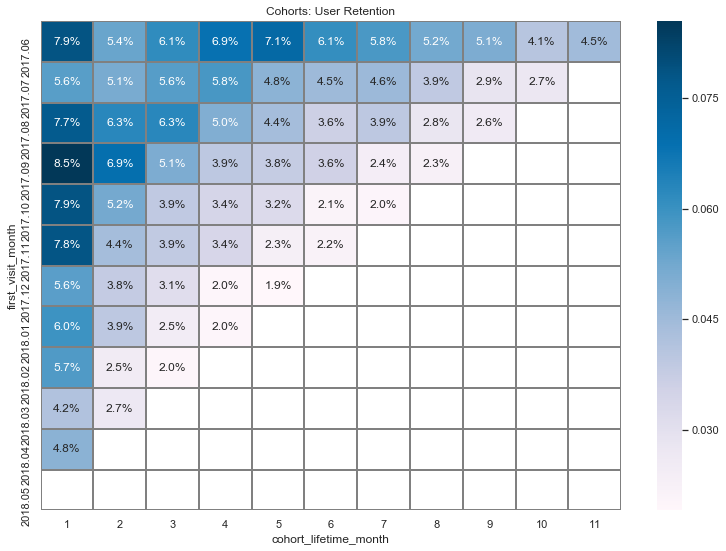

In [44]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, yticklabels = monthes_list, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap="PuBu")
plt.show()

Какие __выводы__ можно сделать из "тепловой карты" Retention Rate:
- в первом же месяце жизни всех когорт происходит большой отток - коэффициент удержания во всех когортах ниже 8.5%;
- наиболее лояльны клиенты из июньской когорты - снижение Retention Rate, в сравнении с другими когортами, в ней минимально, а со 2го по 5й месяцы жизни коэффициент удержания в ней даже растет.
- начиная с октябрьской когорты интерес пользователей к сайту снижается быстрее - имеет смысл задуматься, чо поменялось в сервисах или поддержке, что могло так повлиять на изменение поведения пользователей.
- вторая волна изменений, негативно повлиявших на пользователей, пришлась на март-апрель: Retention Rate этих когорт снизилась почти в 2 раза, по сравнению с первыми когортами, уже в первый месяц жизни. Нужно срочно принимать меры, направленные на удержание пользователей!
- к апрелю-маю происходит критическое снижение Retention Rate во всех когортах - видимо, с улучшением погоды люди начинают отдавать предпочтение улице, а не интернету..

Найдем средний Retention Rate на второй месяц «жизни» когорт.

In [45]:
cohorts[cohorts['cohort_lifetime_month'] == 2]['retention'].mean().round(4)

0.0463

Полученная цифра подтверждает сделанный выше по "тепловой карте" вывод о том, что начиная с октябрьской когорты интерес пользователей к сайту начинает снижаться быстрее: когорты до октября имеют Retention Rate выше полученного среднего, после - ниже.

Посмотрим на графическое изменение Retention Rate

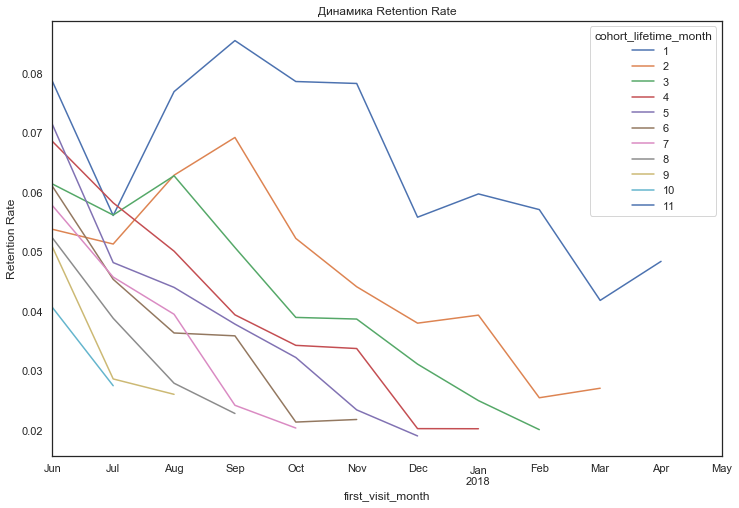

In [46]:
retention_pivot.plot(figsize=(12, 8), legend=True)
plt.ylabel('Retention Rate')
plt.title('Динамика Retention Rate')
plt.show()

По такому графику хорошо заметно, что в некоторых когортах до снижения есть период роста Retention Rate. Но в целом визуализация на "тепловой карте" более наглядна, на мой взгляд.

#### Выводы по разделу
Сформулируем общие __выводы по разделу:__
- Несмотря на то, что обычно метрики DAU, WAU, MAU являются показателями роста, в нашем случае нет постоянное тенденции увеличения числа новых пользователей. Пи этом пик числа новых пользователей (как и максимум заходов на сайт одним пользователем) пришелся на "черную пятницу", а в последний день марта, судя по графикам, сайт не работал.
- Среднее число визитов на одного пользователя всего 1.08 в день, то есть пользователи крайне редко возвращаются в течение дня.
- Retention Rate также невысокий - он не превышает 8.5% уже начиная с первого месяца жизни когорт.
- Но есть и хорошие новости! Средняя продолжительность пользовательской сессии, рассчитанная по медиане, составляет целых 5 минут!
- __Что-то случилось с сайтом или поддержкой в марте!__ Метрики и графики дают сигналы о резком снижении (ухудшении) показателей пользовательской активности начиная с марта.

### Расчет метрик электронной коммерции

#### Time to order

1. Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. 

In [47]:
first_visit_time = visits.groupby('uid')['session_start_ts'].min()
first_visit_time.name = 'first_visit_time'

In [48]:
first_order_time = orders.groupby('uid')['buy_ts'].min()
first_order_time.name = 'first_order_time'

In [49]:
time_to_order = pd.merge(first_visit_time, first_order_time, on='uid')
time_to_order.head(2)


,first_visit_time,first_order_time
uid,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00


In [50]:
time_to_order['time_to_order'] = time_to_order['first_order_time'] - time_to_order['first_visit_time']
time_to_order.head(2)

,first_visit_time,first_order_time,time_to_order
uid,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00


Построим распределение, чтобы выбрать подходящий вариант расчета среднего

In [51]:
time_to_order.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 36523 entries, 313578113262317 to 18446167067214817906
Data columns (total 3 columns):
first_visit_time    36523 non-null datetime64[ns]
first_order_time    36523 non-null datetime64[ns]
time_to_order       36523 non-null timedelta64[ns]
dtypes: datetime64[ns](2), timedelta64[ns](1)
memory usage: 1.1 MB


In [52]:
time_to_order['time_to_order2'] = time_to_order['time_to_order'] / np.timedelta64(1,'D')

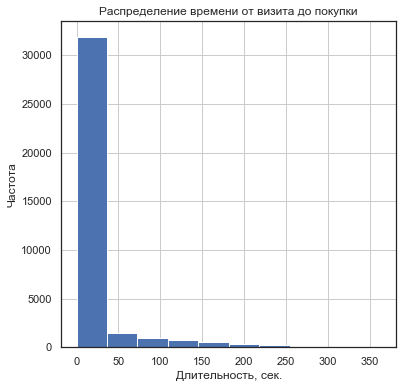

In [53]:
time_to_order['time_to_order2'].hist(figsize=(6,6))
plt.title('Распределение времени от визита до покупки')
plt.ylabel('Частота')
plt.xlabel('Длительность, сек.')
plt.show()

По распределению видно, что подавляющее большинство покупок совершается сразу же (время заказа совпадает с временем захода, их разность равна нулю). Поэтому среднее нам не подходит - правильнее рассчитывать медиану.

In [54]:
time_to_order['time_to_order'].median()

Timedelta('0 days 00:16:00')

Итак, среднее, по медиане, время с момента первого посещения сайта до совершения покупки - 16 минут.

#### Количество заказов на одного покупателя

2. __Применяя когортный анализ, рассчитаем среднее количество покупок на одного покупателя.__

In [55]:
orders.head(2)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447


Добавим в файл с заказами:
1.	Дату первой покупки каждого покупателя;
2.	Число новых покупателей за каждую дату

In [56]:
orders['order_date'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

In [57]:
first_orders = orders.groupby('uid')['order_month'].min().reset_index() 
first_orders.columns = ['uid', 'first_order_month']
first_orders['first_order_month'] = first_orders['first_order_month'].astype('datetime64[M]')
first_orders.head(2)

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01


Добавим месяц первого заказа в файл с заказами, построим когорты, рассчитаем в них количество заказов.

In [58]:
orders_first_month = pd.merge(orders, first_orders, on='uid')
orders_first_month.head(2)

,buy_ts,revenue,uid,order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01


In [59]:
cohorts = orders_first_month.groupby(['first_order_month', 'order_month']).agg({'revenue':'count'}).reset_index()
cohorts = cohorts.rename(columns={'revenue':'orders_qty'})
cohorts.head(2)

,first_order_month,order_month,orders_qty
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177


Расчитаем число новых  покупателей (new_byers) за каждый месяц, далее далее добавим его в таблицу по соответствующим когортам.

In [60]:
cohorts_sizes = first_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohorts_sizes.columns = ['first_order_month', 'new_byers']
cohorts_sizes.head(2)

,first_order_month,new_byers
0,2017-06-01,2023
1,2017-07-01,1923


In [61]:
cohorts_with_byers = pd.merge(cohorts, cohorts_sizes, on='first_order_month')
cohorts_with_byers.head(2)

,first_order_month,order_month,orders_qty,new_byers
0,2017-06-01,2017-06-01,2354,2023
1,2017-06-01,2017-07-01,177,2023


Добавим в таблицу возраст каждой когорты (age), рассчитаем число заказов, приходящееся на одного пользователя (orders_per_byer)

In [62]:
cohorts_with_byers['age_mths'] = ((cohorts_with_byers['order_month'] - cohorts_with_byers['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')
cohorts_with_byers['orders_per_byer'] = cohorts_with_byers['orders_qty'] / cohorts_with_byers['new_byers']
cohorts_with_byers.head(2)

,first_order_month,order_month,orders_qty,new_byers,age_mths,orders_per_byer
0,2017-06-01,2017-06-01,2354,2023,0,1.163618
1,2017-06-01,2017-07-01,177,2023,1,0.087494


Наконец, рассчитаем накопленное число покупок на пользователя и составим тепловую карту.

In [63]:
cohorts_with_byers['first_order_month_formated'] = cohorts_with_byers['first_order_month'].dt.strftime('%Y.%m') 
report = cohorts_with_byers.pivot_table(index='first_order_month_formated', columns='age_mths', values='orders_per_byer', aggfunc='sum').cumsum(axis=1).round(2)
report

age_mths,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_formated,,,,,,,,,,,,
2017.06,1.16,1.25,1.34,1.45,1.59,1.70,1.84,1.92,2.03,2.10,2.15,2.19
2017.07,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,NaN
2017.08,1.12,1.20,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.60,NaN,NaN
2017.09,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.50,NaN,NaN,NaN
2017.10,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,NaN,NaN,NaN,NaN
2017.11,1.18,1.28,1.32,1.37,1.41,1.42,1.45,NaN,NaN,NaN,NaN,NaN
2017.12,1.15,1.21,1.26,1.30,1.32,1.34,NaN,NaN,NaN,NaN,NaN,NaN
2018.01,1.12,1.19,1.24,1.25,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018.02,1.12,1.18,1.21,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


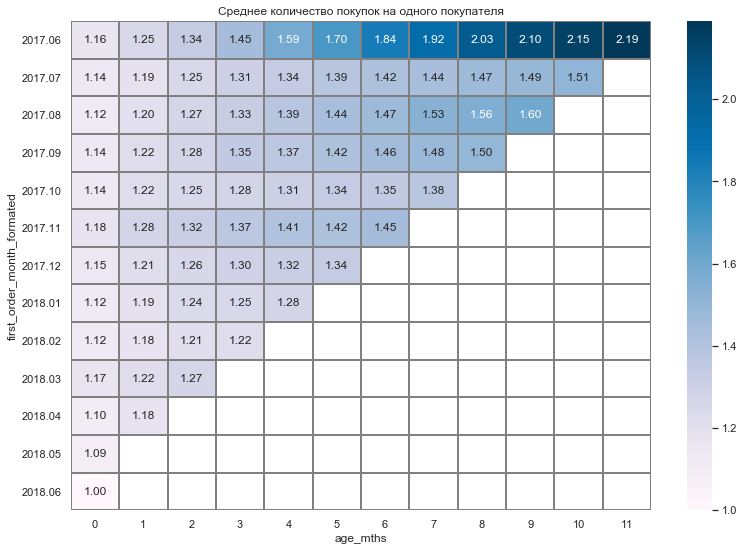

In [64]:
plt.figure(figsize=(13, 9))
plt.title('Cреднее количество покупок на одного покупателя')
sns.heatmap(report, annot=True, linewidths=1, fmt='.2f', linecolor='gray', cmap="PuBu")
plt.show()

Вывод: первая (июнь 2017г) когорта и в этой метрике самая лояльная: число покупок на пользователя в ней к 6-7 месяцу выше, чем в остальных когортах. Наименее лояльная в части покупок на пользователя когорта - октябрьская.

#### Средний чек

__3. Рассчитаем средний чек, применяя группировку по времени совершения покупки.__ Когортный анализ не подходит — он может исказить расчёты. Построим график, отражающий изменения метрики во времени.


In [65]:
orders.head(2)

,buy_ts,revenue,uid,order_date,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01


In [66]:
revenue_per_month = orders.groupby('order_month').agg({'revenue':'sum', 'buy_ts':'count'}).reset_index()
revenue_per_month.columns = ['order_month', 'revenue_per_month', 'qty_of_sales']
revenue_per_month['mean_sale'] = revenue_per_month['revenue_per_month'] / revenue_per_month['qty_of_sales']
revenue_per_month['month'] = revenue_per_month['order_month'].dt.strftime('%Y-%m')
revenue_per_month.head(2)

,order_month,revenue_per_month,qty_of_sales,mean_sale,month
0,2017-06-01,9557.49,2354,4.060106,2017-06
1,2017-07-01,12539.47,2363,5.306589,2017-07


In [67]:
revenue_per_month.describe()

,revenue_per_month,qty_of_sales,mean_sale
count,13.000000,13.000000,13.000000
mean,19389.015385,3878.076923,4.838700
std,9962.071481,1858.113401,0.656336
min,3.420000,1.000000,3.420000
25%,12539.470000,2363.000000,4.771279
50%,19417.130000,4346.000000,4.847139
75%,27069.930000,5326.000000,5.306589
max,36388.600000,6218.000000,5.852139


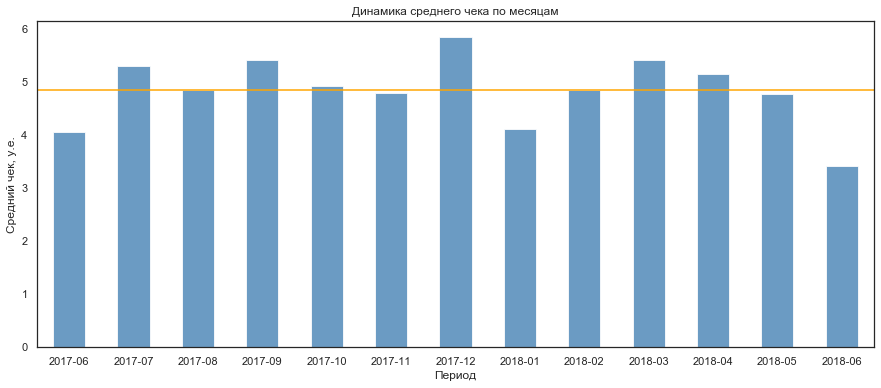

In [68]:
revenue_per_month.plot(kind='bar', color='steelblue', alpha=0.8, x='month', y='mean_sale', rot=0, figsize=(15, 6), legend=False)
plt.title('Динамика среднего чека по месяцам')
plt.xlabel('Период')
plt.ylabel('Средний чек, у.е.')
plt.axhline(y=revenue_per_month['mean_sale'].mean(), color='orange')
plt.show()

Средний чек, в среднем, составил 4.8 у.е. в месяц. При этом наиболее высокие чеки были в декабре, что логично в период новогодних праздников. Минимальные чеки в июне - видимо, перед лтними отпусками наступает период экономии.

#### LTV по когортам

__4. Выясним, как меняется LTV на покупателя по когортам.__ Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт включим когорты, «прожившие» не менее 6 месяцев. Для вычислений считаем, что маржинальность сервиса — 100%. Отразим изменения метрики во времени на графике.
Большую часть работы мы уже выполнили, когда рассчитывали число покупок на пользователя, применяя когортный анализ. Теперь заменим число покупок на выручку, чтобы рассчитать LTV.

In [69]:
cohorts_for_ltv = orders_first_month.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
cohorts_for_ltv.head(2)

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82


In [70]:
MARGIN_RATE = 1

cohorts_with_byers2 = pd.merge(cohorts_for_ltv, cohorts_sizes, on='first_order_month')
cohorts_with_byers2['age_mths'] = ((cohorts_with_byers2['order_month'] - cohorts_with_byers2['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')
cohorts_with_byers2['gross_profit'] = cohorts_with_byers2['revenue'] * MARGIN_RATE
cohorts_with_byers2['ltv'] = cohorts_with_byers2['gross_profit'] / cohorts_with_byers2['new_byers']
cohorts_with_byers2.head(2)


,first_order_month,order_month,revenue,new_byers,age_mths,gross_profit,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,9557.49,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,981.82,0.485329


Построим сводную таблицу со средним ltv, чтобы определить, какие когорты прожили больше 6 месяцев.

In [71]:
cohorts_with_byers2['first_order_month_formated'] = cohorts_with_byers2['first_order_month'].dt.strftime('%Y.%m')
report_ltv = cohorts_with_byers2.pivot_table(index='first_order_month_formated', columns = 'age_mths', values='ltv', aggfunc='mean')
report_ltv

age_mths,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_formated,,,,,,,,,,,,
2017.06,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017.07,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017.08,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017.09,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017.10,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017.11,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017.12,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018.01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018.02,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Итак, если нулевой месяц не брать в расчет, то 6 месяцев и более "прожили" когорты до ноябрьской включительно.
Возьмем соответствующий срез данных и построим сводную таблицу и график (тепловую карту) для просмотра накопленного ltv по этим когортам

In [72]:
report_ltv_6_mths = (cohorts_with_byers2.loc[cohorts_with_byers2['first_order_month'] <= '2017-11-01']).pivot_table(index='first_order_month_formated', columns = 'age_mths', values='ltv', aggfunc='mean')
report_ltv_6_mths.cumsum(axis=1)

age_mths,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_formated,,,,,,,,,,,,
2017.06,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017.07,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017.08,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017.09,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017.10,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017.11,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN


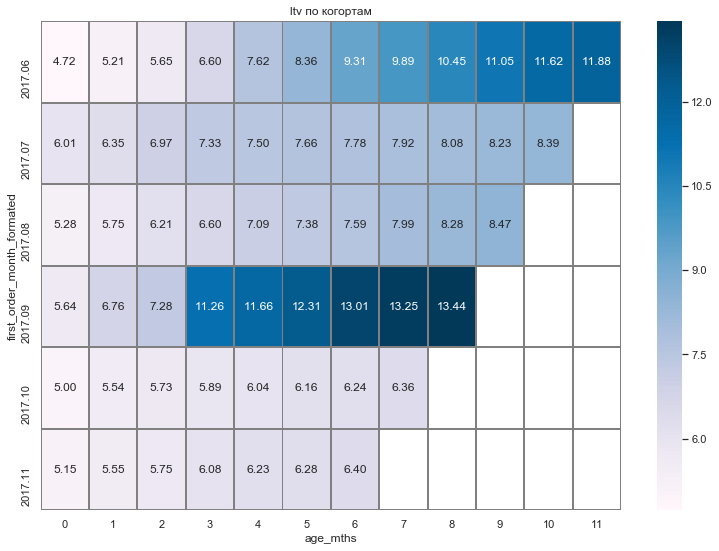

In [73]:
plt.figure(figsize=(13, 9))
plt.title('ltv по когортам')
sns.heatmap(report_ltv_6_mths.cumsum(axis=1), annot=True, linewidths=1, fmt='.2f', linecolor='gray', cmap="PuBu")
plt.show()


__Вывод,__ который можно сделать, глядя на полученную тепловую карту, отличается от выводов предыдущих расчетов: несмотря на то, что мы считали, что наиболее лояльны клиенты из первой когорты, на практике, наиболее доходные в части суммарного ltv за 6 месяцев - клиенты из сентябрьской когорты! Они принеслит сервису за 6 месяцев (не считая месяца формирования когорты) 13 у.е., тогда как выручка с первой (июньской) когорты всего 9.3 у.е. за 6 месяцев. 
Для полноты расчетов построим линейный графк изменения накопленного ltv когорт по месяцам

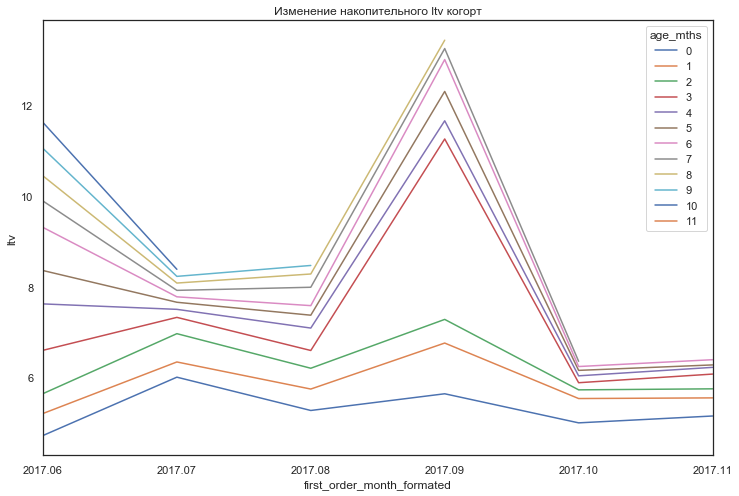

In [74]:
report_ltv_6_mths.cumsum(axis=1).plot(figsize=(12,8))
plt.title('Изменение накопительного ltv когорт')
plt.ylabel('ltv')
plt.show()

Судя по графику, вне зависимости от возраста когорты, пик ее ltv (в большинстве случаев) приходится на сентябрь.

Перейдем к маркетинговым метрикам

### Расчет маркетинговых метрик
Посчитаем и отобразим на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

#### Cost of marketing

__1. Посчитаем общую сумму расходов на маркетинг.__ Выясним, как траты распределены по источникам. Визуализируем изменение метрик во времени;

In [75]:
costs.head(2)

,source_id,marketing_date,marketing_costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25


In [76]:
costs['month'] = costs['marketing_date'].astype('datetime64[M]')

print('Общие расходы на мркетинг', costs['marketing_costs'].sum().round(2))

Общие расходы на мркетинг 329131.62


In [77]:
costs_by_month = costs.groupby('month')['marketing_costs'].sum().reset_index()
costs_by_month.columns = ['month', 'marketing_costs']

In [78]:
costs_by_month['month_formated'] = costs_by_month['month'].dt.strftime('%Y-%m')
costs_by_month

,month,marketing_costs,month_formated
0,2017-06-01,18015.00,2017-06
1,2017-07-01,18240.59,2017-07
2,2017-08-01,14790.54,2017-08
3,2017-09-01,24368.91,2017-09
4,2017-10-01,36322.88,2017-10
5,2017-11-01,37907.88,2017-11
6,2017-12-01,38315.35,2017-12
7,2018-01-01,33518.52,2018-01
8,2018-02-01,32723.03,2018-02
9,2018-03-01,30415.27,2018-03


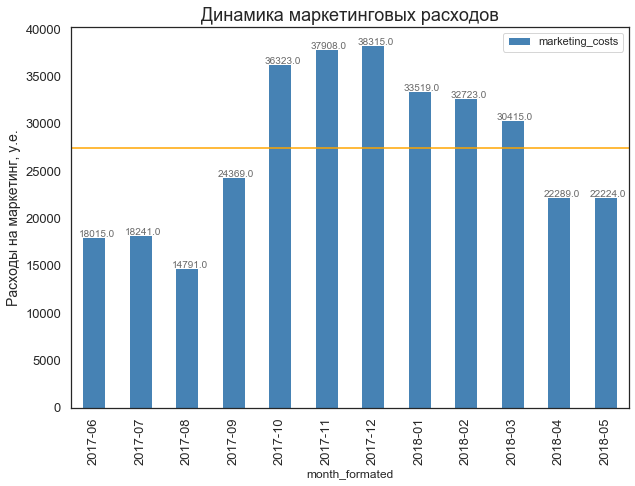

In [79]:
ax = costs_by_month.plot(kind='bar', y='marketing_costs', x='month_formated', figsize=(10,7), color="steelblue", fontsize=13);
ax.set_alpha(0.6)
ax.set_title("Динамика маркетинговых расходов", fontsize=18)
ax.axhline(y=costs_by_month['marketing_costs'].mean(), color='orange')
ax.set_ylabel("Расходы на маркетинг, у.е.", fontsize=14);


for i in ax.patches:
    
    ax.text(i.get_x()-.08, i.get_height()+3, \
            str(round(i.get_height())), fontsize=10,
                color='dimgrey')

Пик расходов на маркетинг приходится на осенне-зимной период и значительно снижается с началом весны - возможно, причина снижения пользовательской активности, которую мы наблюдали ранее в весенне-летние месяцы, обусловлена не только внешними факторами, но и маркетинговыми расходами: меньше привлечение - меньше трафик.
Посмотрим расходы в разрезе источников.

In [80]:
costs.pivot_table(index = 'source_id', values='marketing_costs', aggfunc='sum').sort_values(by='marketing_costs', ascending=False)

,marketing_costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


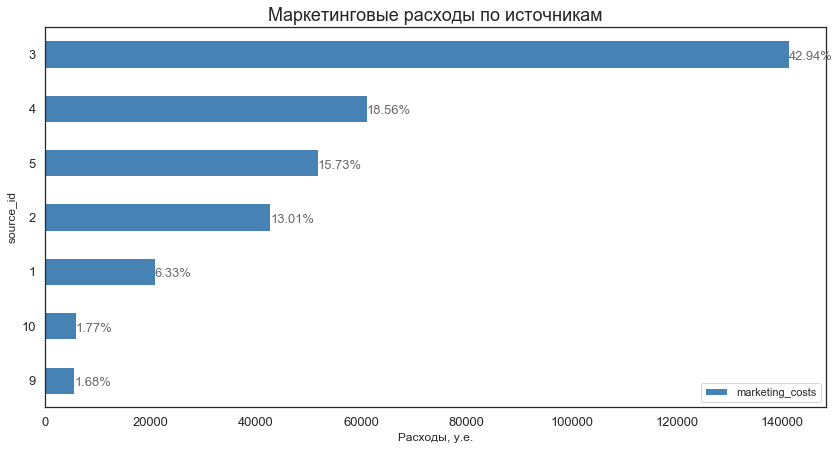

In [81]:
ax = costs.pivot_table(index = 'source_id', values='marketing_costs', aggfunc='sum').sort_values(by='marketing_costs', ascending=True).plot(kind='barh', figsize=(14,7),
                                        color="steelblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Маркетинговые расходы по источникам", fontsize=18)
ax.set_xlabel("Расходы, у.е.", fontsize=12);
#ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.15, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
color='dimgrey')

# invert for largest on top 
#ax.invert_yaxis()

Более, чем с двухкратным отрывом, __"лидирует" по расходам на маркетинг источник 3__. Расходы на источники 9 и 10, по сравнению с остальными, минимальны.
Наконец, посмотрим одновременно разбивку по источникам и динамику по месяцам.

In [82]:
costs['month_no'] = costs['marketing_date'].dt.month
costs_pivot = costs.pivot_table(index = 'source_id', columns='month_no', values='marketing_costs', aggfunc='sum')
costs_pivot

month_no,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,
1,2186.18,2204.48,1893.09,1327.49,1467.61,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20
2,4157.74,4474.34,3943.14,2993.70,2689.44,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80
3,14808.78,14228.56,13080.85,9296.81,9411.42,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52
4,5832.79,5711.96,5961.87,4408.49,4214.21,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47
5,5371.52,5071.31,4529.62,3501.15,3669.56,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52
9,547.16,551.50,480.29,373.49,362.17,285.22,302.54,248.93,415.62,609.41,683.18,657.98
10,614.35,480.88,526.41,388.25,409.86,314.22,329.82,232.57,460.67,627.24,792.36,645.86


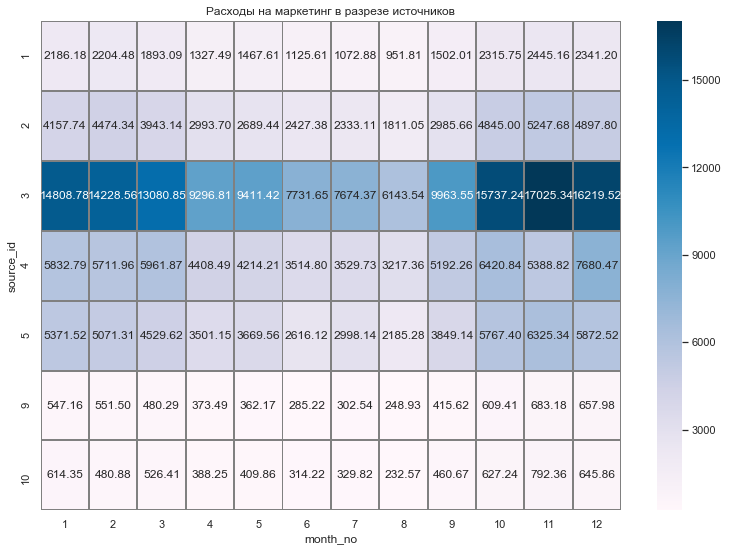

In [83]:
plt.figure(figsize=(13, 9))
plt.title('Расходы на маркетинг в разрезе источников')
sns.heatmap(costs_pivot, annot=True, linewidths=1, fmt='.2f', linecolor='gray', cmap="PuBu")
plt.show()

Text(0, 0.5, 'Расходы, у.е.')

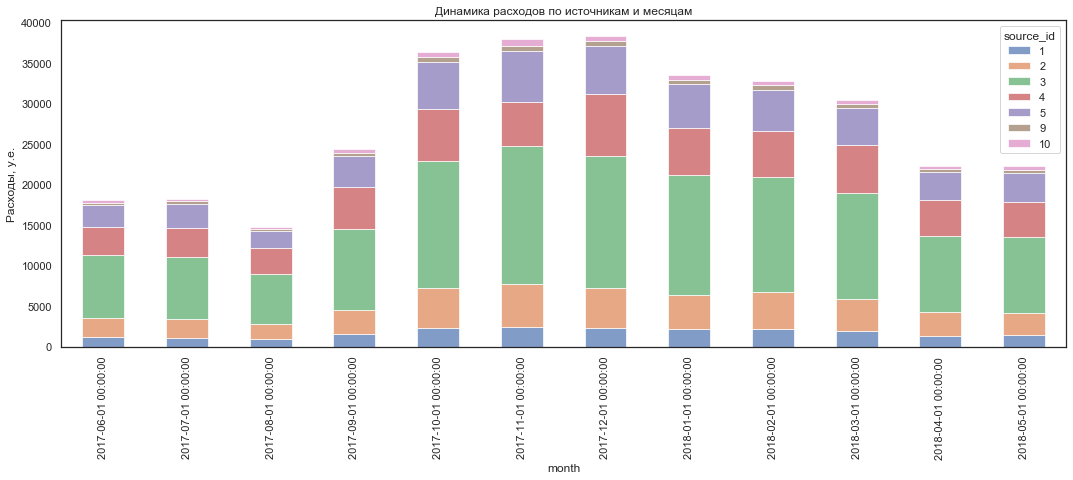

In [84]:
ax = costs.pivot_table(index = 'month', columns='source_id', values='marketing_costs', aggfunc='sum').plot.bar(rot=90, stacked=True, figsize=(18,6), alpha=0.7)
plt.title('Динамика расходов по источникам и месяцам')
plt.ylabel('Расходы, у.е.')


__Подведем итог:__ наибольшие расходы на маркетинг у сервиса были в период с октября по март (с пиком в декабре и дальнейшим плавным снижением к марту), главнй источник трафика по расходам - № 3. Стоит посмотреть, компенсировался ли этот расход доходами от клиентов, привлеченных с этого канала. 

#### Cost of customer acquisition

__2. Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика.__ Отразим изменения метрик на графиках;

In [85]:
costs_groupped = costs.groupby(['source_id', 'month']).agg({'marketing_costs':'sum'}).reset_index()
costs_groupped

,source_id,month,marketing_costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


Модификация таблицы заказов с добавлением месяца первого заказа по каждому пользователю у нас уже была - в таблице orders_first_month:

In [86]:
orders_first_month.head(2)

,buy_ts,revenue,uid,order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01


In [87]:
visits.head(2)

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_week_start,session_date,session_month_rnd,session_duration_sec,first_visit_date,first_visit_month,visit_month,cohort_lifetime_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-14,2017-12-20,2017-12-01,1080,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-15,2018-02-19,2018-02-01,1680,2018-02-19,2018-02-01,2018-02-01,0


Сгруппируем визиты по первому источнику.

In [88]:
first_visit_sourse = visits.sort_values(by=['uid', 'session_start_ts']).groupby('uid').agg({'source_id':'first', 'session_month_rnd':'first'}).reset_index()
first_visit_sourse.head(2)

,uid,source_id,session_month_rnd
0,11863502262781,3,2018-03-01
1,49537067089222,2,2018-02-01


In [89]:
first_visit_sourse.columns = ['uid', 'first_sourse_id', 'first_visit_month']
first_visit_sourse.head(2)

,uid,first_sourse_id,first_visit_month
0,11863502262781,3,2018-03-01
1,49537067089222,2,2018-02-01


In [90]:
orders_with_sources = pd.merge(orders_first_month, first_visit_sourse, on='uid')
orders_with_sources.head(2)

,buy_ts,revenue,uid,order_date,order_month,first_order_month,first_sourse_id,first_visit_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2,2017-06-01


Рассчитаем с использованием полученной таблицы число покупателей по источникам, а также выручку по ним (выручка в разрезе источников привлечения пригодится нам потом для расчета ROMI). Далее соединим полученную таблицу с таблицей расходов на маркетинг.

In [91]:
orders_with_sources_size = orders_with_sources.groupby(['first_sourse_id', 'first_order_month']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
orders_with_sources_size

,first_sourse_id,first_order_month,uid,revenue
0,1,2017-06-01,190,6392.39
1,1,2017-07-01,160,3342.52
2,1,2017-08-01,113,2110.91
3,1,2017-09-01,227,2364.55
4,1,2017-10-01,340,2850.08
...,...,...,...,...
81,10,2018-01-01,92,292.93
82,10,2018-02-01,123,319.02
83,10,2018-03-01,186,657.44
84,10,2018-04-01,107,261.93


В таблице orders_with_sources_size считается количество уникальных пользователей, совершивших покупку в первый месяц в разрезе источников привлечения, а также выручка, агрегированная по такому принципу, то есть, учитывая, что маржинальность, по условиям задачи, 100%, по сути это совокупный ltv. Поэтому можно рассчитать разницу между выручкой и расходами на привлечение пользователей, а также ROMI в разрезе источников, но в данном случае без когортного анализа. Для него нужно будет созать еще одну табицу (сделаем это в следующем разделе).

In [92]:
orders_costs_sources = pd.merge(costs_groupped,  orders_with_sources_size, left_on = ['source_id', 'month'], right_on = ['first_sourse_id', 'first_order_month'])
orders_costs_sources

,source_id,month,marketing_costs,first_sourse_id,first_order_month,uid,revenue
0,1,2017-06-01,1125.61,1,2017-06-01,190,6392.39
1,1,2017-07-01,1072.88,1,2017-07-01,160,3342.52
2,1,2017-08-01,951.81,1,2017-08-01,113,2110.91
3,1,2017-09-01,1502.01,1,2017-09-01,227,2364.55
4,1,2017-10-01,2315.75,1,2017-10-01,340,2850.08
...,...,...,...,...,...,...,...
79,10,2018-01-01,614.35,10,2018-01-01,92,292.93
80,10,2018-02-01,480.88,10,2018-02-01,123,319.02
81,10,2018-03-01,526.41,10,2018-03-01,186,657.44
82,10,2018-04-01,388.25,10,2018-04-01,107,261.93


In [93]:
orders_costs_sources = orders_costs_sources.drop(columns=['first_sourse_id', 'first_order_month'])
orders_costs_sources.columns = ['source_id', 'month', 'marketing_costs', 'new_byers_no', 'revenue']

In [94]:
orders_costs_sources['romi_total'] = orders_costs_sources['revenue'] / orders_costs_sources['marketing_costs']
orders_costs_sources

,source_id,month,marketing_costs,new_byers_no,revenue,romi_total
0,1,2017-06-01,1125.61,190,6392.39,5.679045
1,1,2017-07-01,1072.88,160,3342.52,3.115465
2,1,2017-08-01,951.81,113,2110.91,2.217785
3,1,2017-09-01,1502.01,227,2364.55,1.574257
4,1,2017-10-01,2315.75,340,2850.08,1.230737
...,...,...,...,...,...,...
79,10,2018-01-01,614.35,92,292.93,0.476813
80,10,2018-02-01,480.88,123,319.02,0.663409
81,10,2018-03-01,526.41,186,657.44,1.248912
82,10,2018-04-01,388.25,107,261.93,0.674643


In [95]:
orders_costs_sources['cac_per_byer'] = orders_costs_sources['marketing_costs'] / orders_costs_sources['new_byers_no']
orders_costs_sources['revenue_per_byer'] = orders_costs_sources['revenue'] / orders_costs_sources['new_byers_no']
orders_costs_sources['month_fmt'] = orders_costs_sources['month'].dt.strftime('%Y.%m') 
orders_costs_sources.head(2)

,source_id,month,marketing_costs,new_byers_no,revenue,romi_total,cac_per_byer,revenue_per_byer,month_fmt
0,1,2017-06-01,1125.61,190,6392.39,5.679045,5.924263,33.644158,2017.06
1,1,2017-07-01,1072.88,160,3342.52,3.115465,6.705500,20.890750,2017.07


Наконец рассчитаем __средний CAC на одного покупателя__ для всего проекта и для каждого источника трафика и визуализируем его в динамике по месяцам

In [96]:
orders_costs_sources.pivot_table(index='source_id', columns='month_fmt', values='cac_per_byer', aggfunc='sum', margins=True).sort_values(by='All', ascending=False)

month_fmt,2017.06,2017.07,2017.08,2017.09,2017.10,2017.11,2017.12,2018.01,2018.02,2018.03,2018.04,2018.05,All
source_id,,,,,,,,,,,,,
All,51.197328,59.111647,67.332704,58.353337,52.126013,59.340828,58.474380,65.799882,59.436291,51.985079,63.555156,45.582318,692.294964
3,12.118574,14.989004,18.230089,12.757426,13.660799,14.001102,12.315505,14.720457,13.029817,13.640094,15.019079,11.150972,165.632917
2,10.329277,11.216875,14.723984,13.509774,12.234848,13.185126,12.855118,14.238836,15.270785,11.700712,14.255714,6.527767,150.048815
5,6.812813,7.087801,6.070222,6.535042,6.103069,9.127475,7.616757,8.485814,7.479808,8.578826,8.142209,7.383421,89.423257
1,5.924263,6.705500,8.423097,6.616784,6.811029,7.546790,7.073112,9.185630,8.016291,6.736975,7.416145,6.089668,86.545286
4,8.510412,6.827331,9.518817,8.800441,5.478532,4.578437,5.577683,5.651928,5.164521,5.515143,6.407689,5.241555,77.272488
9,4.194412,5.818077,4.080820,4.777241,4.836587,4.711586,5.437851,6.839500,6.565476,2.983168,8.685814,6.036167,64.966699
10,3.307579,6.467059,6.285676,5.356628,3.001148,6.190313,7.598353,6.677717,3.909593,2.830161,3.628505,3.152769,58.405501


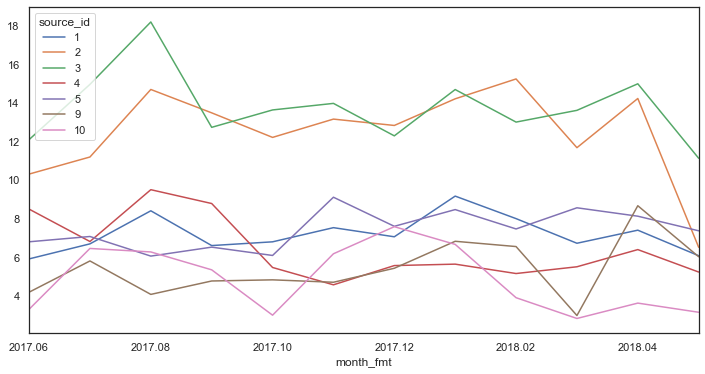

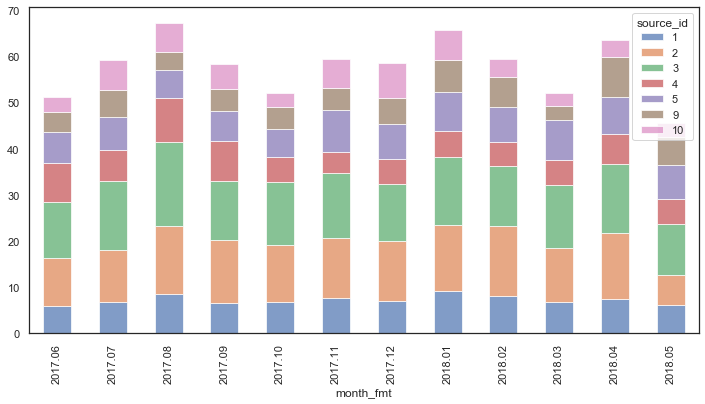

In [97]:
orders_costs_sources.pivot_table(index='month_fmt', columns='source_id', values='cac_per_byer', aggfunc='sum').plot(figsize=(12,6))
orders_costs_sources.pivot_table(index='month_fmt', columns='source_id', values='cac_per_byer', aggfunc='sum').plot.bar(rot=90, stacked=True, alpha=0.7, figsize=(12,6))
plt.show()

На графиках хорошо видно, что __самые дорогие в части САС на клиента - источники 3 и 2. Остальные источники значительно дешевле и от месяца к месяцу меняются по дороговизне привлечения клиента.__
Суммарно самые дорогие по привлечению 1 клиента месяцы - август, январь и апрель. Возможно имеет место быть отложенный эффект.

In [98]:
total_cac = orders_costs_sources.pivot_table(index='month_fmt', values=(['cac_per_byer', 'new_byers_no']), aggfunc='sum').reset_index()
total_cac

,month_fmt,cac_per_byer,new_byers_no
0,2017.06,51.197328,2023
1,2017.07,59.111647,1923
2,2017.08,67.332704,1369
3,2017.09,58.353337,2581
4,2017.10,52.126013,4340
5,2017.11,59.340828,4081
6,2017.12,58.474380,4383
7,2018.01,65.799882,3373
8,2018.02,59.436291,3651
9,2018.03,51.985079,3533


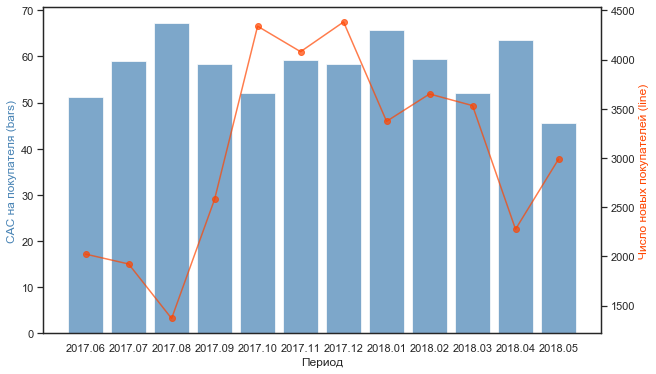

In [99]:
x = total_cac['month_fmt']
y = total_cac['cac_per_byer']
y1 = total_cac['new_byers_no']

fig, ax1 = plt.subplots(figsize=(10, 6))


ax2 = ax1.twinx()
ax1.bar(x, y, color='steelblue', alpha=0.7)
ax2.plot(x, y1, 'o-', color='orangered', alpha=0.7)

ax1.set_xlabel('Период')
ax1.set_ylabel('CAC на покупателя (bars)', color='steelblue')
ax2.set_ylabel('Число новых покупателей (line)', color='orangered')


plt.show()

Полученный график очень нагляден: судя по нему, _в большинстве случаев после увеличения расходов на привлечение следует рост числа новых покупателей_ (например, в период с августа по октябрь на волне маркетинга предыдущих месяцев начинается рост числа клиентов, а за снижением САС число новых клиентов также падает). Наконец посмотрим на ROMI. Общий ROMI (без деления клиентов на когорты) мы рассчитали в текущем разделе - сгруппируем его по источникам и месяцам.

#### ROMI

In [100]:
orders_costs_sources.pivot_table(index='source_id', columns='month_fmt', values='romi_total', aggfunc='sum', margins=True).sort_values(by='All', ascending=False)

month_fmt,2017.06,2017.07,2017.08,2017.09,2017.10,2017.11,2017.12,2018.01,2018.02,2018.03,2018.04,2018.05,All
source_id,,,,,,,,,,,,,
All,13.279834,8.267029,7.818467,11.487497,7.001155,6.269383,6.964796,3.929591,4.379321,6.378990,4.166201,5.489752,85.432016
1,5.679045,3.115465,2.217785,1.574257,1.230737,1.347875,0.784944,0.764946,0.763854,1.791706,0.670709,0.857305,20.798628
5,1.673333,0.956550,1.667562,4.004988,0.989198,0.570403,0.697736,0.626210,0.597625,0.570960,0.523654,0.570652,13.448869
9,1.655389,1.210352,1.451974,2.024012,1.452487,0.960684,0.873416,0.484538,0.769139,0.931645,0.649094,0.615871,13.078601
2,1.612957,1.010484,0.564695,1.976551,1.022289,0.737183,2.881190,0.543889,0.435030,0.622978,0.437368,1.048597,12.893211
4,1.420471,0.919793,0.680281,0.875832,0.938349,1.475637,0.818265,0.723333,0.824323,0.861131,0.814760,0.902402,11.254576
10,0.767806,0.564308,0.899557,0.491957,0.949365,0.821205,0.524464,0.476813,0.663409,1.248912,0.674643,1.148905,9.231343
3,0.470834,0.490078,0.336612,0.539898,0.418730,0.356397,0.384783,0.309861,0.325942,0.351658,0.395973,0.346020,4.726786


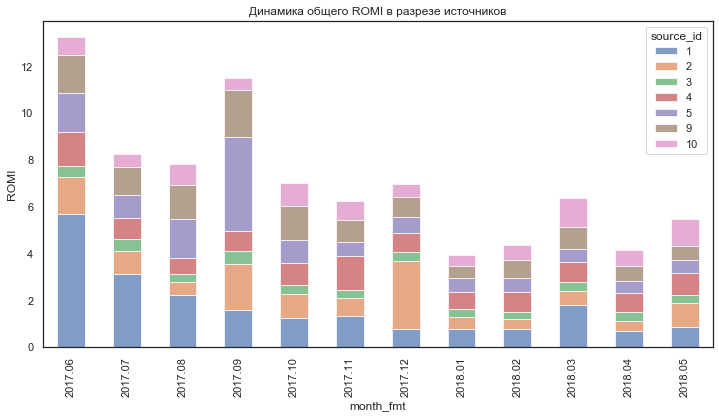

In [101]:
orders_costs_sources.pivot_table(index='month_fmt', columns='source_id', values='romi_total', aggfunc='sum').plot.bar(rot=90, stacked=True, alpha=0.7, figsize=(12,6))
plt.title('Динамика общего ROMI в разрезе источников')
plt.ylabel('ROMI')
plt.show()

Любопытный __вывод__ можно сделать, глядя на эти таблицу и график с общими ROMI: несмотря на то, что самым расходным в части САС был третий источник, возврат на маркетинговые инвестиции по нему наименьший из всех, то есть данный источник трафика самый дорогой, но наименее эффективный! Деньги потрачены зря. А вот source_id №1 был явно недооценен маркетологами - он наиболее эффективный из всех, далее имеет смысл усилить кампании по источникам № 5, 9 и 2 - их ROMI также достаточно высокий.

3. Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт.

In [102]:
orders_with_sources.head(2)

,buy_ts,revenue,uid,order_date,order_month,first_order_month,first_sourse_id,first_visit_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2,2017-06-01


In [103]:
first_visit_sourse.head(2)

,uid,first_sourse_id,first_visit_month
0,11863502262781,3,2018-03-01
1,49537067089222,2,2018-02-01


In [104]:
orders_with_sources['first_sourse_id'].unique()

array([ 1,  2,  3,  5,  4,  9, 10,  7], dtype=int64)

In [105]:
#sources = [ 1,  2,  3,  5,  4,  9, 10,  7]

In [106]:
costs.head(2)

,source_id,marketing_date,marketing_costs,month,month_no
0,1,2017-06-01,75.20,2017-06-01,6
1,1,2017-06-02,62.25,2017-06-01,6


In [107]:
costs_gr = costs.groupby(['source_id', 'month']).agg({'marketing_costs':'sum'}).reset_index()
costs_gr.head(2)

,source_id,month,marketing_costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88


In [108]:
orders_with_sources_size.head(2)

,first_sourse_id,first_order_month,uid,revenue
0,1,2017-06-01,190,6392.39
1,1,2017-07-01,160,3342.52


In [109]:
orders_by_sources = orders_with_sources.groupby(['first_sourse_id', 'first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
orders_by_sources.head(2)


,first_sourse_id,first_order_month,order_month,revenue
0,1,2017-06-01,2017-06-01,1378.70
1,1,2017-06-01,2017-07-01,414.98


In [110]:
orders_by_sources_with_sizes = pd.merge(orders_by_sources, orders_with_sources_size, on=['first_sourse_id', 'first_order_month'])
orders_by_sources_with_sizes.head(20)

,first_sourse_id,first_order_month,order_month,revenue_x,uid,revenue_y
0,1,2017-06-01,2017-06-01,1378.70,190,6392.39
1,1,2017-06-01,2017-07-01,414.98,190,6392.39
2,1,2017-06-01,2017-08-01,419.43,190,6392.39
3,1,2017-06-01,2017-09-01,714.24,190,6392.39
4,1,2017-06-01,2017-10-01,811.20,190,6392.39
5,1,2017-06-01,2017-11-01,389.34,190,6392.39
6,1,2017-06-01,2017-12-01,490.48,190,6392.39
7,1,2017-06-01,2018-01-01,479.23,190,6392.39
8,1,2017-06-01,2018-02-01,432.15,190,6392.39
9,1,2017-06-01,2018-03-01,316.30,190,6392.39


In [111]:
orders_by_sources_with_sizes = orders_by_sources_with_sizes.drop(columns=['revenue_y'])
orders_by_sources_with_sizes.columns = ['first_source_id', 'first_order_month', 'order_month', 'revenue', 'byers_qty']
orders_by_sources_with_sizes.head()

,first_source_id,first_order_month,order_month,revenue,byers_qty
0,1,2017-06-01,2017-06-01,1378.70,190
1,1,2017-06-01,2017-07-01,414.98,190
2,1,2017-06-01,2017-08-01,419.43,190
3,1,2017-06-01,2017-09-01,714.24,190
4,1,2017-06-01,2017-10-01,811.20,190


Добавим в таблицу маркетинговые расходы, рассчитаем недостающие показатели

In [112]:
orders_by_sources_with_sizes_costs = pd.merge(orders_by_sources_with_sizes, costs_gr, left_on=['first_source_id', 'order_month'], right_on=['source_id', 'month'])
orders_by_sources_with_sizes_costs.head()

,first_source_id,first_order_month,order_month,revenue,byers_qty,source_id,month,marketing_costs
0,1,2017-06-01,2017-06-01,1378.70,190,1,2017-06-01,1125.61
1,1,2017-06-01,2017-07-01,414.98,190,1,2017-07-01,1072.88
2,1,2017-07-01,2017-07-01,1166.70,160,1,2017-07-01,1072.88
3,1,2017-06-01,2017-08-01,419.43,190,1,2017-08-01,951.81
4,1,2017-07-01,2017-08-01,175.31,160,1,2017-08-01,951.81


In [113]:
df = orders_by_sources_with_sizes_costs.drop(columns=['source_id', 'month'])
df.columns = ['source_id', 'first_order_month', 'order_month', 'revenue', 'byers_qty', 'marketing_costs']
df.head()

,source_id,first_order_month,order_month,revenue,byers_qty,marketing_costs
0,1,2017-06-01,2017-06-01,1378.70,190,1125.61
1,1,2017-06-01,2017-07-01,414.98,190,1072.88
2,1,2017-07-01,2017-07-01,1166.70,160,1072.88
3,1,2017-06-01,2017-08-01,419.43,190,951.81
4,1,2017-07-01,2017-08-01,175.31,160,951.81


In [114]:
df['gross_profit'] = df['revenue'] * MARGIN_RATE
df['ltv'] = df['gross_profit'] / df['byers_qty']
df['age'] = ((df['order_month'] - df['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')
df['cac'] = df['marketing_costs'] / df['byers_qty']
df['romi'] = df['ltv'] / df['cac']
df.head()

,source_id,first_order_month,order_month,revenue,byers_qty,marketing_costs,gross_profit,ltv,age,cac,romi
0,1,2017-06-01,2017-06-01,1378.70,190,1125.61,1378.70,7.256316,0,5.924263,1.224847
1,1,2017-06-01,2017-07-01,414.98,190,1072.88,414.98,2.184105,1,5.646737,0.386791
2,1,2017-07-01,2017-07-01,1166.70,160,1072.88,1166.70,7.291875,0,6.705500,1.087447
3,1,2017-06-01,2017-08-01,419.43,190,951.81,419.43,2.207526,2,5.009526,0.440666
4,1,2017-07-01,2017-08-01,175.31,160,951.81,175.31,1.095687,1,5.948813,0.184186


Проверим на источнике №1 ltv, romi и сводную таблицу, полученную делением сводного (накопительного ltv) на сас.

In [115]:
df_source1 = df.query('source_id == 1')
df_source1.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,7.26,9.44,11.65,15.41,19.68,21.73,24.31,26.83,29.10,30.77,31.97,33.64
2017-07-01,7.29,8.39,13.74,15.25,16.13,17.03,17.47,18.12,18.98,19.96,20.89,NaN
2017-08-01,7.49,8.69,9.70,10.67,11.70,12.37,13.05,15.71,17.90,18.68,NaN,NaN
2017-09-01,6.01,7.82,8.38,9.30,9.34,9.43,9.52,9.83,10.42,NaN,NaN,NaN
2017-10-01,6.02,7.07,7.32,7.71,7.77,7.88,8.06,8.38,NaN,NaN,NaN,NaN
2017-11-01,7.39,7.96,8.93,9.82,9.99,10.09,10.17,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.58,4.90,5.18,5.43,5.46,5.55,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,5.77,5.86,6.00,6.98,7.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.69,5.69,5.75,6.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df_source1.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.22,1.61,2.05,2.53,2.88,3.04,3.25,3.47,3.66,3.83,4.00,4.22
2017-07-01,1.09,1.27,1.84,1.95,2.00,2.07,2.10,2.14,2.22,2.34,2.44,NaN
2017-08-01,0.89,0.98,1.03,1.07,1.12,1.16,1.19,1.35,1.54,1.60,NaN,NaN
2017-09-01,0.91,1.09,1.14,1.23,1.23,1.24,1.25,1.30,1.39,NaN,NaN,NaN
2017-10-01,0.88,1.03,1.07,1.13,1.14,1.16,1.20,1.28,NaN,NaN,NaN,NaN
2017-11-01,0.98,1.06,1.20,1.33,1.36,1.39,1.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.65,0.70,0.74,0.78,0.79,0.81,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.63,0.64,0.66,0.83,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.58,0.73,0.74,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
orders_costs_sources1 = orders_costs_sources.query('source_id == 1')['cac_per_byer']
table_ltv1 = df_source1.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(2)
table_ltv1.div(orders_costs_sources1, axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.23,1.41,1.38,2.33,2.89,2.88,3.44,2.92,3.63,4.57,4.31,5.52
2017-07-01,1.23,1.25,1.63,2.30,2.37,2.26,2.47,1.97,2.37,2.96,2.82,NaN
2017-08-01,1.26,1.30,1.15,1.61,1.72,1.64,1.85,1.71,2.23,2.77,NaN,NaN
2017-09-01,1.01,1.17,0.99,1.41,1.37,1.25,1.35,1.07,1.30,NaN,NaN,NaN
2017-10-01,1.02,1.05,0.87,1.17,1.14,1.04,1.14,0.91,NaN,NaN,NaN,NaN
2017-11-01,1.25,1.19,1.06,1.48,1.47,1.34,1.44,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.77,0.73,0.61,0.82,0.80,0.74,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.97,0.87,0.71,1.05,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.79,0.85,0.68,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Напишем функцию для последовательного расчета и вывода таблиц с ltv, romi в разрезе источников привлечения и тепловых карт по ним.

In [118]:
df['first_order'] = df['first_order_month'].dt.strftime('%Y-%m')
df.head()

,source_id,first_order_month,order_month,revenue,byers_qty,marketing_costs,gross_profit,ltv,age,cac,romi,first_order
0,1,2017-06-01,2017-06-01,1378.70,190,1125.61,1378.70,7.256316,0,5.924263,1.224847,2017-06
1,1,2017-06-01,2017-07-01,414.98,190,1072.88,414.98,2.184105,1,5.646737,0.386791,2017-06
2,1,2017-07-01,2017-07-01,1166.70,160,1072.88,1166.70,7.291875,0,6.705500,1.087447,2017-07
3,1,2017-06-01,2017-08-01,419.43,190,951.81,419.43,2.207526,2,5.009526,0.440666,2017-06
4,1,2017-07-01,2017-08-01,175.31,160,951.81,175.31,1.095687,1,5.948813,0.184186,2017-07


source_id =  1


'Накопленный ltv'

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,7.26,9.44,11.65,15.41,19.68,21.73,24.31,26.83,29.1,30.77,31.97,33.64
2017-07,7.29,8.39,13.74,15.25,16.13,17.03,17.47,18.12,18.98,19.96,20.89,
2017-08,7.49,8.69,9.7,10.67,11.7,12.37,13.05,15.71,17.9,18.68,,
2017-09,6.01,7.82,8.38,9.3,9.34,9.43,9.52,9.83,10.42,,,
2017-10,6.02,7.07,7.32,7.71,7.77,7.88,8.06,8.38,,,,
2017-11,7.39,7.96,8.93,9.82,9.99,10.09,10.17,,,,,
2017-12,4.58,4.9,5.18,5.43,5.46,5.55,,,,,,
2018-01,5.77,5.86,6,6.98,7.03,,,,,,,
2018-02,4.69,5.69,5.75,6.12,,,,,,,,


'Накопленный ROMI'

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,1.22,1.61,2.05,2.53,2.88,3.04,3.25,3.47,3.66,3.83,4,4.22
2017-07,1.09,1.27,1.84,1.95,2,2.07,2.1,2.14,2.22,2.34,2.44,
2017-08,0.89,0.98,1.03,1.07,1.12,1.16,1.19,1.35,1.54,1.6,,
2017-09,0.91,1.09,1.14,1.23,1.23,1.24,1.25,1.3,1.39,,,
2017-10,0.88,1.03,1.07,1.13,1.14,1.16,1.2,1.28,,,,
2017-11,0.98,1.06,1.2,1.33,1.36,1.39,1.4,,,,,
2017-12,0.65,0.7,0.74,0.78,0.79,0.81,,,,,,
2018-01,0.63,0.64,0.66,0.83,0.84,,,,,,,
2018-02,0.58,0.73,0.74,0.81,,,,,,,,


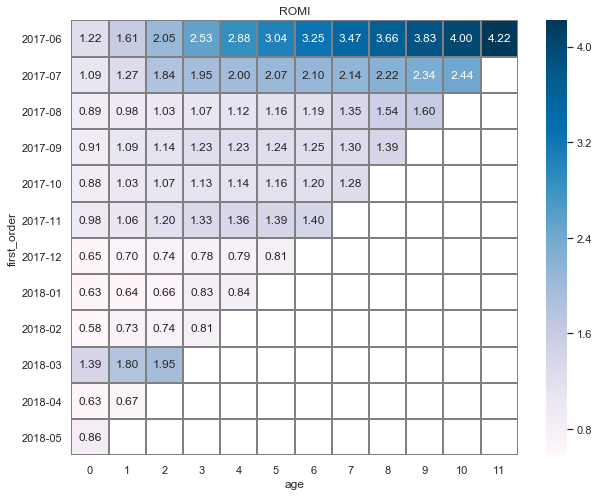

source_id =  2


'Накопленный ltv'

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,4.44,4.93,5.2,7.13,8.8,9.72,11.32,12.8,14.14,14.87,16.23,16.66
2017-07,8.43,9.2,9.25,9.58,10.01,10.19,10.49,10.63,10.74,10.97,11.33,
2017-08,5.74,6.67,6.85,7.1,7.62,7.68,7.8,8.2,8.23,8.31,,
2017-09,8.28,16.41,18.77,19.7,21.1,22.08,25.4,26.15,26.7,,,
2017-10,7.68,10.13,10.79,11.33,11.89,12.16,12.26,12.51,,,,
2017-11,6.99,7.9,8.34,9.12,9.43,9.58,9.72,,,,,
2017-12,8.81,10.35,19.68,30.78,33.83,37.04,,,,,,
2018-01,4.34,5.43,7.17,7.42,7.74,,,,,,,
2018-02,5.42,6.06,6.39,6.64,,,,,,,,


'Накопленный ROMI'

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,0.43,0.48,0.51,0.67,0.75,0.79,0.87,0.95,1.02,1.06,1.17,1.21
2017-07,0.75,0.84,0.84,0.86,0.87,0.88,0.9,0.9,0.91,0.93,0.95,
2017-08,0.39,0.43,0.43,0.44,0.45,0.45,0.46,0.47,0.47,0.47,,
2017-09,0.61,0.98,1.08,1.12,1.2,1.25,1.43,1.49,1.53,,,
2017-10,0.63,0.81,0.87,0.92,0.97,0.99,1.01,1.04,,,,
2017-11,0.53,0.6,0.65,0.72,0.75,0.77,0.79,,,,,
2017-12,0.69,0.83,1.62,2.69,3.08,3.54,,,,,,
2018-01,0.31,0.38,0.5,0.53,0.56,,,,,,,
2018-02,0.35,0.4,0.43,0.46,,,,,,,,


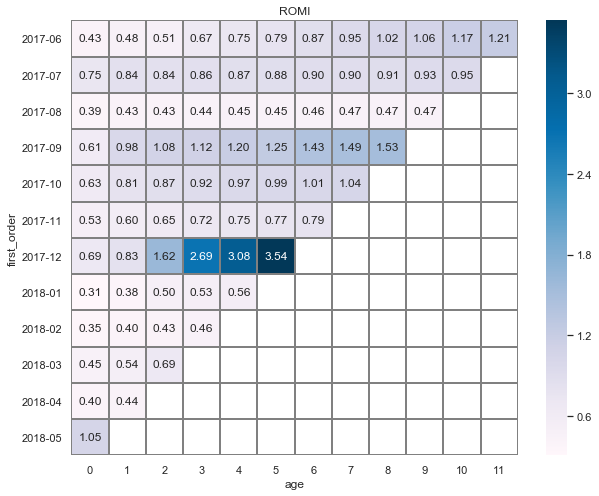

source_id =  3


'Накопленный ltv'

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,4.40,4.51,4.69,5.01,5.19,5.38,5.51,5.54,5.59,5.65,5.67,5.71
2017-07,6.11,6.37,6.49,6.89,6.93,7,7.03,7.17,7.25,7.29,7.35,
2017-08,5.08,5.23,5.52,5.63,5.79,5.84,5.9,6,6.08,6.14,,
2017-09,5.56,5.81,6.14,6.22,6.45,6.57,6.69,6.77,6.89,,,
2017-10,4.79,5.24,5.36,5.43,5.53,5.63,5.65,5.72,,,,
2017-11,4.53,4.67,4.75,4.87,4.92,4.96,4.99,,,,,
2017-12,4.18,4.31,4.45,4.58,4.68,4.74,,,,,,
2018-01,4.11,4.3,4.43,4.51,4.56,,,,,,,
2018-02,3.79,4.1,4.19,4.25,,,,,,,,


'Накопленный ROMI'

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,0.36,0.37,0.39,0.41,0.42,0.43,0.43,0.43,0.43,0.44,0.44,0.44
2017-07,0.41,0.43,0.44,0.45,0.45,0.45,0.45,0.46,0.46,0.46,0.47,
2017-08,0.28,0.28,0.29,0.29,0.3,0.3,0.3,0.3,0.3,0.31,,
2017-09,0.44,0.45,0.46,0.47,0.48,0.49,0.49,0.5,0.51,,,
2017-10,0.35,0.38,0.39,0.39,0.4,0.41,0.41,0.42,,,,
2017-11,0.32,0.33,0.34,0.35,0.36,0.36,0.36,,,,,
2017-12,0.34,0.35,0.36,0.38,0.39,0.4,,,,,,
2018-01,0.28,0.29,0.3,0.31,0.32,,,,,,,
2018-02,0.29,0.32,0.33,0.33,,,,,,,,


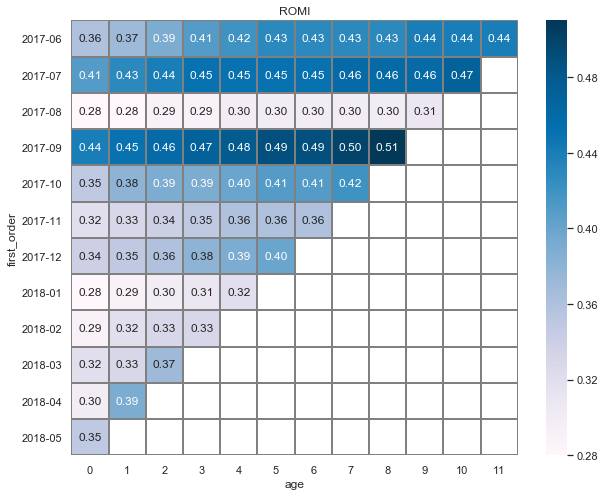

source_id =  4


'Накопленный ltv'

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,4.75,4.79,4.96,5.42,6.56,8.05,9.48,9.72,9.93,10.73,12,12.09
2017-07,5.54,5.6,5.68,5.84,5.9,5.96,6.06,6.11,6.2,6.26,6.28,
2017-08,5.06,5.23,5.36,5.63,5.78,5.99,6.07,6.26,6.35,6.48,,
2017-09,4.77,5.25,5.56,5.85,5.9,6.14,7.39,7.66,7.71,,,
2017-10,4.37,4.51,4.67,4.78,4.9,4.99,5.08,5.14,,,,
2017-11,5.14,5.79,5.89,6.3,6.49,6.54,6.76,,,,,
2017-12,4.17,4.26,4.35,4.44,4.48,4.56,,,,,,
2018-01,3.78,3.9,3.99,4.06,4.09,,,,,,,
2018-02,4.09,4.2,4.24,4.26,,,,,,,,


'Накопленный ROMI'

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,0.56,0.56,0.58,0.62,0.69,0.81,0.89,0.9,0.92,0.97,1.09,1.1
2017-07,0.81,0.82,0.83,0.84,0.85,0.85,0.86,0.87,0.87,0.88,0.88,
2017-08,0.53,0.54,0.55,0.57,0.57,0.59,0.59,0.6,0.61,0.62,,
2017-09,0.54,0.59,0.62,0.64,0.65,0.67,0.8,0.83,0.84,,,
2017-10,0.80,0.83,0.85,0.87,0.9,0.92,0.94,0.96,,,,
2017-11,1.12,1.22,1.24,1.33,1.36,1.38,1.44,,,,,
2017-12,0.75,0.77,0.79,0.81,0.82,0.85,,,,,,
2018-01,0.67,0.69,0.71,0.72,0.73,,,,,,,
2018-02,0.79,0.81,0.82,0.83,,,,,,,,


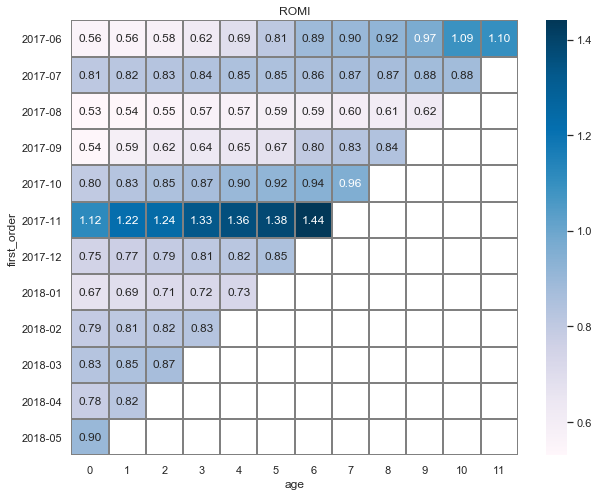

source_id =  5


'Накопленный ltv'

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,4.95,5.85,6.3,7.17,7.83,8.13,9.04,9.62,10.18,11.13,11.28,11.4
2017-07,5.29,5.61,6.06,6.21,6.31,6.42,6.45,6.56,6.65,6.71,6.78,
2017-08,5.05,5.8,6.63,7.34,8.42,9.02,9.4,9.65,9.89,10.12,,
2017-09,6.20,6.38,6.71,22.88,23.65,25.67,25.95,26.15,26.17,,,
2017-10,5.09,5.31,5.43,5.56,5.67,5.77,5.91,6.04,,,,
2017-11,4.56,4.75,4.87,4.92,5.06,5.1,5.21,,,,,
2017-12,5.01,5.14,5.23,5.29,5.31,5.31,,,,,,
2018-01,4.35,4.87,5.25,5.29,5.31,,,,,,,
2018-02,4.32,4.41,4.46,4.47,,,,,,,,


'Накопленный ROMI'

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,0.73,0.84,0.92,1.01,1.05,1.07,1.13,1.17,1.21,1.29,1.31,1.32
2017-07,0.75,0.81,0.86,0.87,0.88,0.88,0.89,0.89,0.9,0.91,0.92,
2017-08,0.83,0.9,0.95,0.99,1.06,1.1,1.13,1.15,1.17,1.2,,
2017-09,0.95,0.97,1,2.62,2.7,2.94,2.97,3.01,3.01,,,
2017-10,0.83,0.87,0.89,0.91,0.93,0.95,0.99,1.02,,,,
2017-11,0.50,0.52,0.54,0.54,0.57,0.57,0.59,,,,,
2017-12,0.66,0.68,0.69,0.7,0.7,0.71,,,,,,
2018-01,0.51,0.58,0.63,0.64,0.64,,,,,,,
2018-02,0.58,0.59,0.6,0.6,,,,,,,,


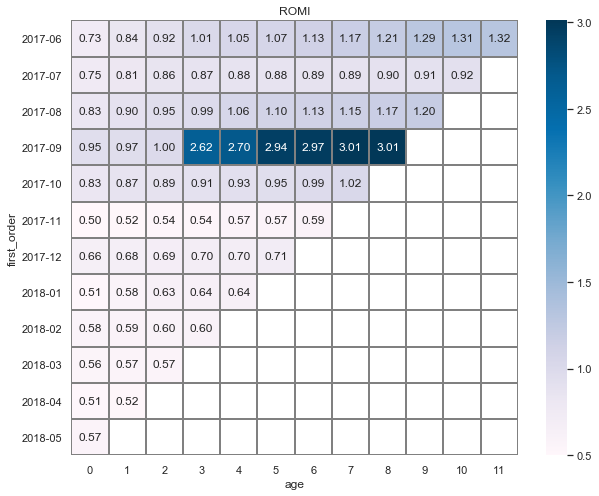

source_id =  9


'Накопленный ltv'

age,0,1,2,3,4,5,6,7,8,9,10
first_order,,,,,,,,,,,
2017-06,3.57,3.64,4.23,4.84,5.1,5.55,6.08,6.2,6.74,6.86,6.94
2017-07,4.47,4.63,5.25,5.74,6.11,6.17,6.46,6.51,6.94,6.97,7.04
2017-08,4.07,4.27,4.91,5.15,5.2,5.27,5.4,5.69,5.77,5.93,
2017-09,4.30,5.32,5.95,6.75,7.35,7.48,8.09,8.76,9.67,,
2017-10,5.06,5.6,6.04,6.16,6.45,6.99,7.01,7.03,,,
2017-11,3.74,3.87,4.04,4.32,4.47,4.51,4.53,,,,
2017-12,3.83,4.14,4.31,4.58,4.6,4.75,,,,,
2018-01,2.83,3.05,3.25,3.29,3.31,,,,,,
2018-02,4.80,4.97,5.05,,,,,,,,


'Накопленный ROMI'

age,0,1,2,3,4,5,6,7,8,9,10
first_order,,,,,,,,,,,
2017-06,0.85,0.87,1.03,1.13,1.16,1.2,1.26,1.27,1.34,1.35,1.37
2017-07,0.77,0.8,0.88,0.92,0.95,0.95,0.98,0.99,1.03,1.04,1.05
2017-08,1.00,1.03,1.09,1.11,1.12,1.13,1.14,1.18,1.19,1.22,
2017-09,0.90,1.05,1.13,1.23,1.33,1.35,1.46,1.61,1.83,,
2017-10,1.05,1.15,1.23,1.26,1.32,1.47,1.47,1.48,,,
2017-11,0.79,0.82,0.87,0.94,0.99,1,1.01,,,,
2017-12,0.70,0.77,0.81,0.88,0.89,0.93,,,,,
2018-01,0.41,0.45,0.48,0.49,0.49,,,,,,
2018-02,0.73,0.76,0.78,,,,,,,,


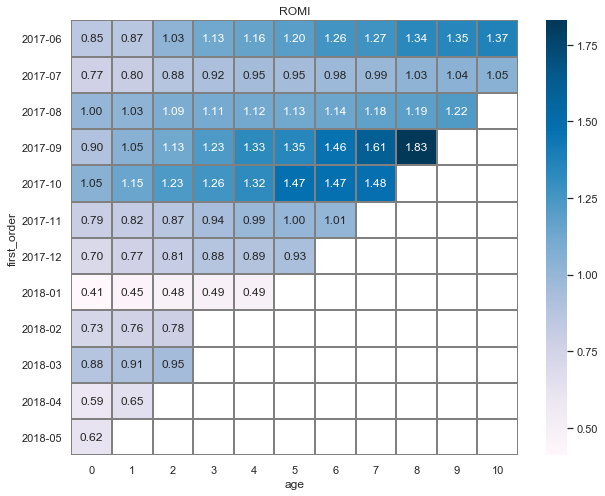

source_id =  10


'Накопленный ltv'

age,0,1,2,3,4,5,6,7,8,9
first_order,,,,,,,,,,
2017-06,2.41,2.53,,,,,,,2.54,
2017-07,3.46,3.49,,3.64,,,,,3.65,
2017-08,5.00,5.11,5.44,,,,,5.56,,5.65
2017-09,2.23,2.3,2.38,2.57,2.6,,,2.61,2.64,
2017-10,2.62,2.7,2.71,2.73,2.77,2.78,2.8,2.85,,
2017-11,4.62,4.67,4.69,4.87,4.98,5.03,5.08,,,
2017-12,3.79,3.93,,,,3.99,,,,
2018-01,3.10,3.11,3.18,,,,,,,
2018-02,2.47,2.59,2.59,,,,,,,


'Накопленный ROMI'

age,0,1,2,3,4,5,6,7,8,9
first_order,,,,,,,,,,
2017-06,0.73,0.76,,,,,,,0.77,
2017-07,0.54,0.54,,0.55,,,,,0.55,
2017-08,0.80,0.8,0.82,,,,,0.83,,0.84
2017-09,0.42,0.43,0.43,0.46,0.46,,,0.47,0.47,
2017-10,0.87,0.89,0.9,0.9,0.92,0.92,0.93,0.96,,
2017-11,0.75,0.76,0.76,0.81,0.83,0.85,0.87,,,
2017-12,0.50,0.52,,,,0.53,,,,
2018-01,0.46,0.47,0.48,,,,,,,
2018-02,0.63,0.66,0.66,,,,,,,


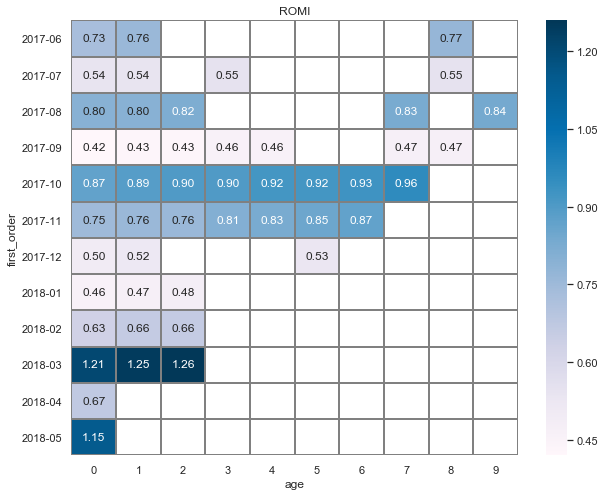

In [119]:
def romi_by_source(table):
    table = df.query('source_id == @source')
    
    ltv_pivot = table.pivot_table(index='first_order', columns='age', values='ltv', aggfunc='mean')
    romi_pivot = table.pivot_table(index='first_order', columns='age', values='romi', aggfunc='mean')
    output_ltv = ltv_pivot.cumsum(axis=1).round(2)   
    output_romi = romi_pivot.cumsum(axis=1).round(2)
    
    print('source_id = ', source)
    
    display('Накопленный ltv')
    display(output_ltv.fillna(''))
    display( )
    display('Накопленный ROMI')
    display(output_romi.fillna(''))
    
    sns.set(style='white')
    plt.figure(figsize=(10, 8))
    plt.title('ROMI')
    sns.heatmap(output_romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="PuBu")
    plt.show()
    return plt.show()

sources = [1, 2, 3, 4, 5, 9, 10]

for source in sources:
    romi_by_source(source)

Из полученных таблиц и тепловых карт по каждому из источников можно сделать следующие __выводы:__

- __Source_id 1:__ Первые две когорты (июнь-июль 2017) окупились сразу же – ROMI в них выше единицы, то есть затраты на привлечение клиента не превышают доходов по клиенту. Последующие когорты до ноябрьской включительно окупились в первом месяце жизни, а вот когорты начиная с декабрьской не окупились вовсе – за исключением высокодоходной (судя по таблице ltv) мартовской. При этом у данного источника очень высокий ltv, особенно, у первых трех когорт.

- __Source_id 2:__ несмотря на достаточно высокий ltv, за счет высоких расходов на привлечение с окупаемостью все не очень хорошо: июньская когорта окупилась только в 8й месяц (ROMI=1.02), июльская и августовская не окупились. Почти сразу (на 3й месяц) окупились сентябрьская и декабрьская когорты. С 5го месяца окупилась когорта октября. Учитывая хаотичность окупаемости когорт из данного источника, сделать однозначные выводы о том, имеет ли смысл вкладываться в привлечение клиентов из него, сложно – видимо, влияют сторонние факторы (сложно сделать вывод, не понимая, что это за источник трафика).  

- __Source_id 3:__ в сравнении с предыдущими источниками, накопленный доход на клиента гораздо ниже. Вместе с тем (мы это видели ранее при анализе маркетинговых расходов по источникам) расходы на привлечение клиента очень высокие. Как результат, привлечение ни одной из когорт на исследуемом горизонте не окупилось. __Вкладываться в привлечение клиентов из данного источника, учитывая высокие маркетинговые расходы и низкий ltv, нецелесообразно__.

- __Source_id 4:__ поведение когорт неоднородно. Июньская когорта окупилась на 10й месяц жизни, ноябрьская – сразу же, остальные на горизонте исследования не окупились.

- __Source_id 5:__ июньская, августовская и сентябрьская когорты окупились на 3-4 месяцы жизни, но обусловлено это в основном высоким ltv этих когорт, по сравнению с остальными. То есть целесообразно привлекать клиентов из данного источника, но при этом важно уделять внимание их дальнейшей «жизни», мотивируя клиентов на увеличение средних чеков, т.к. в когортах с небольшими ltv расходы на привлечение не компенсируются выручкой.

- __Source_id 9:__ прекрасные результаты по когортам до ноября (июльские чуть хуже других): несмотря на невысокие, в сравнении с предыдущими источниками, ltv, расходы на привлечение настолько малы, что по итогу они окупаются почти сразу же (июльская когорта на 7-8 месяц, остальные до ноябрьской не позднее 3го). Разумно продолжать привлечение из данного источника в случае, если САС на клиента будет неизменным, а ltv новых когорт будет на уровне ноябрьской когорты или выше.

- __Source_id 10:__ выручка по клиентам из данного источника нестабильна, в некоторые месяцы клиенты из данного источника не приносят доходов, поэтому говорить о целесообразности инвестиций в их привлечение я бы не стала – расходы на привлечение есть, а будут ли доходы – большой вопрос.


## Выводы и рекомендации

Сформулируем __итоговые выводы и рекомендации__

__1. Источники трафика, на которые маркетологам стоит делать упор:__

  - №1 - самый эффективный в части отношения ltv и cac на клиента. При низких расходах на привлечение клиенты из данного источника приносят существенные доходы. Привлечение таких клиентов однозначно можно и нужно продолжать!
  - источники №№ 2, 5 и 9 - можно прожолжать привлечение, но "с умом" - постоянно отслеживая поведение клиентов и то, продолжают ли доходы по ним превышать расходы.
  - не стоит тратить впустую деньги на привлечение клиентов из источника 3! Расходы на привлечение настолько высоки, что не окупаются.

__2. Выводы по каждому блоку метрик__ 

__Продуктовые:__ 

  - рост числа новых пользователей нестабилен: на него влияют календарные события (например, «черная пятница») и какие-то внутренние изменения (возможно, на сайте либо в поддержке). С марта-апреля динамика привлечения новых клиентов ухудшилась.
  - среднее число пользовательских визитов на сайт за день невелико (1.08), но их продолжительность (5 минут) вполне адекватна.
  - коэффициент удержания пользователей крайне низок по всем когортам. Самые лояльные клиенты – первые клиенты (июньская когорта)
  - снижение пользовательской активности имеет 2 волны: октябрь-ноябрь и март-апрель

__Метрики электронной коммерции:__

  - большая часть пользователей начинает визит на сайт с покупки;
  - среднее время от визита до покупки – 16 минут. Учитывая, что среднее время на сайте было равным 5 минутам, получается, что _большая часть пользователей до покупки не доходит._ Возможно, дело в неудобной навигации.
  - среднее количество покупок на клиента выше 1.15 по всем когортам, что является хорошим индикатором.
  - самая лояльная по числу покупок на пользователя – самая первая когорта.

__Маркетинговые:__

  - наибольшие расходы на маркетинг у сервиса были в период с октября по март (с пиком в декабре и дальнейшим плавным снижением к марту), главнй источник трафика по расходам - № 3.
  -  самые дорогие, в части САС на клиента, - источники 3 и 2. Остальные источники значительно дешевле и от месяца к месяцу меняются по дороговизне привлечения клиента. Суммарно самые дорогие по привлечению 1 клиента месяцы: август, январь и апрель.
  - _в большинстве случаев после увеличения расходов на привлечение следует рост числа новых покупателей._
  - несмотря на то, что самым расходным в части САС был третий источник, возврат на маркетинговые инвестиции по нему наименьший из всех, то есть данный источник трафика самый дорогой, но наименее эффективный, а вот source_id №1 был явно недооценен маркетологами - он наиболее эффективный из всех.

__3. Самые перспективные для компании когорты клиентов__
Самая доходная когорта, как с расходами на привлечение, так и без них – сентябрьская. Также выгодно выделяются первые когорты. _Чем позже формировалась когорта, тем ниже ее лояльность._